In [3]:
import pandas as pd
from IPython.display import display,HTML
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("crop_yield.csv")

In [7]:
df.rename(columns=lambda x:x.strip())

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
...,...,...,...,...,...,...,...,...,...,...
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159


# Data Preprocessing

In [9]:
df_num=df.copy(deep=True)


In [11]:
display(HTML(df_num.head(10).to_html()))

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251
5,South,Silt,Soybean,797.471182,37.704974,False,True,Rainy,74,5.898416
6,West,Clay,Wheat,357.902357,31.593431,False,False,Rainy,90,2.652392
7,South,Sandy,Rice,441.131154,30.887107,True,True,Sunny,61,5.829542
8,North,Silt,Wheat,181.587861,26.752729,True,False,Sunny,127,2.943716
9,West,Sandy,Wheat,395.048968,17.646199,False,True,Rainy,140,3.707293


In [13]:
col=df_num.columns
print(col)

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')


In [15]:
for i in col:
    if (df_num[i].dtype=='object'):
        print(i,"----",df_num[i].dtype,"----",df[i].unique())

Region ---- object ---- ['West' 'South' 'North' 'East']
Soil_Type ---- object ---- ['Sandy' 'Clay' 'Loam' 'Silt' 'Peaty' 'Chalky']
Crop ---- object ---- ['Cotton' 'Rice' 'Barley' 'Soybean' 'Wheat' 'Maize']
Weather_Condition ---- object ---- ['Cloudy' 'Rainy' 'Sunny']


In [17]:
print("minimum: ",df_num['Yield_tons_per_hectare'].min(),"\n","maximum:  ",df_num['Yield_tons_per_hectare'].max())

minimum:  -1.147613222534901 
 maximum:   9.963372228814649


In [19]:
# negative values make false prediction 
# remove false data
count=0
for i in df_num['Yield_tons_per_hectare']:
    if i<0:
        count=count+1
print(count)
        

231


In [21]:
# find variance in columns for integer columns
for i in col:
    if df_num[i].dtype!='object':
        print("variance of column ",i," = ",df_num[i].var())

variance of column  Rainfall_mm  =  67522.70865034132
variance of column  Temperature_Celsius  =  52.137173935288416
variance of column  Fertilizer_Used  =  0.25000024640024643
variance of column  Irrigation_Used  =  0.24999999091899097
variance of column  Days_to_Harvest  =  673.5796088292068
variance of column  Yield_tons_per_hectare  =  2.8783580818874026


In [23]:
df_num=df_num.drop_duplicates(keep=False)
df_num.shape

(1000000, 10)

In [25]:
#removing false values
df_num=df_num[df_num['Yield_tons_per_hectare']>=0]
df_num.shape

(999769, 10)

In [27]:
#revised min and max
print("minimum: ",df_num['Yield_tons_per_hectare'].min(),"\n","maximum:  ",df_num['Yield_tons_per_hectare'].max())

minimum:  0.0004108724039286 
 maximum:   9.963372228814649


In [29]:
df_demo=pd.DataFrame()
for i in col:
    if df_num[i].dtype!='object' and i!='Yield_tons_per_hectare':
        df_demo[i]=(df_num[i])
df_demo.shape
df_demo.columns

Index(['Rainfall_mm', 'Temperature_Celsius', 'Fertilizer_Used',
       'Irrigation_Used', 'Days_to_Harvest'],
      dtype='object')

### demo corelation between only numelical coumns

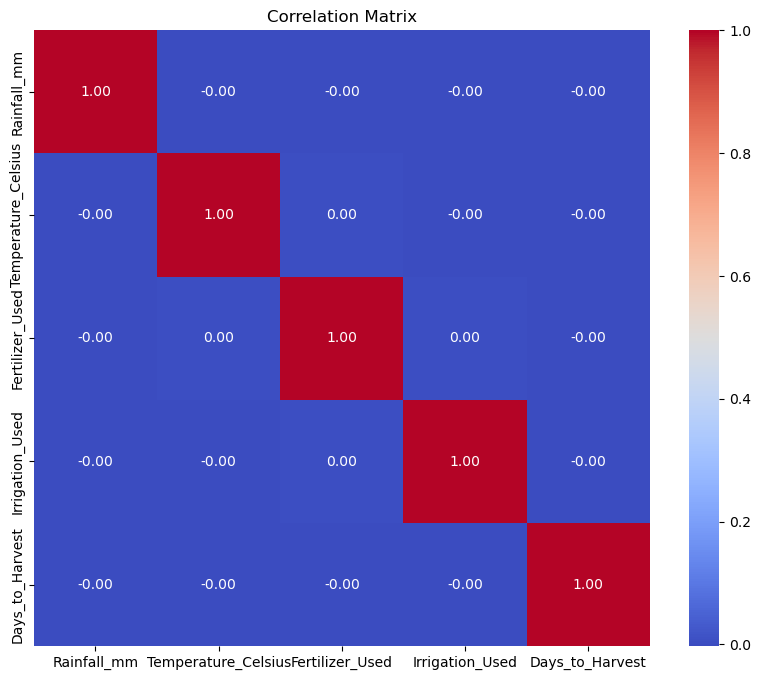

In [33]:

plt.figure(figsize=(10, 8))
correlation_matrix = df_demo.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [35]:
for i in col:
    print(i,"--",df_num[i].dtype,"---",df_num[i].isnull().any())

Region -- object --- False
Soil_Type -- object --- False
Crop -- object --- False
Rainfall_mm -- float64 --- False
Temperature_Celsius -- float64 --- False
Fertilizer_Used -- bool --- False
Irrigation_Used -- bool --- False
Weather_Condition -- object --- False
Days_to_Harvest -- int64 --- False
Yield_tons_per_hectare -- float64 --- False


## creating different data frames for classification and regression algorithms

In [65]:
df_R=df_num.copy(deep=True) # for regression
df_C=df_num.copy(deep=True) # for classifcation

### convering the continous yeilds to discrete yeilds to apply classification algorithms

# Classification

## converting the continous values to discrete for classification aldorithms

In [41]:

def categorize_yield(value):
    if value <= 2:
        return 'E'
    elif value<=4:
        return 'D'
    elif value<=6: 
        return 'C'
    elif value<=8:
        return 'B'
    elif value<=10:
        return 'A'

df_C['yield_category'] = df_C['Yield_tons_per_hectare'].apply(categorize_yield)

In [43]:
df_C['yield_category']

0         B
1         A
2         E
3         B
4         B
         ..
999995    E
999996    B
999997    C
999998    D
999999    D
Name: yield_category, Length: 999769, dtype: object

In [45]:
# Count occurrences
value_counts = df_C['yield_category'].value_counts()
counts = value_counts[['A','B', 'C', 'D', 'E']]

# Print the counts
print("Value Counts:")
print(counts)

Value Counts:
yield_category
A     20183
B    208676
C    409999
D    299923
E     60988
Name: count, dtype: int64


In [47]:
display(HTML(df_C.tail(10).to_html()))

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,yield_category
999990,North,Sandy,Soybean,270.497720,20.392190,False,True,Sunny,119,2.164441,D
999991,East,Clay,Soybean,349.872329,17.036670,True,False,Cloudy,100,3.033848,D
999992,South,Clay,Rice,984.947787,21.507580,False,True,Rainy,92,6.758406,B
999993,West,Loam,Maize,196.392138,30.261504,True,True,Rainy,107,3.689114,D
999994,West,Loam,Wheat,167.459161,22.153946,False,True,Cloudy,120,2.930204,D
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586,E
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594,B
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182,C
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159,D
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243,D


#### crosstab to get each categories of crop with respect to yeild category

In [49]:

count_by_crop = pd.crosstab(df_C['Crop'], df_C['yield_category'])

print(count_by_crop)

yield_category     A      B      C      D      E
Crop                                            
Barley          3304  34954  68191  50086  10192
Cotton          3361  34889  68035  50201  10062
Maize           3377  34490  68439  50240  10239
Rice            3401  34785  68534  49772  10262
Soybean         3369  34813  68209  49789  10135
Wheat           3371  34745  68591  49835  10098


#### Undersampling the data to train model better if we have all labels of equal size

New Value Counts:
yield_category
A    20000
B    20000
C    20000
D    20000
E    20000
Name: count, dtype: int64


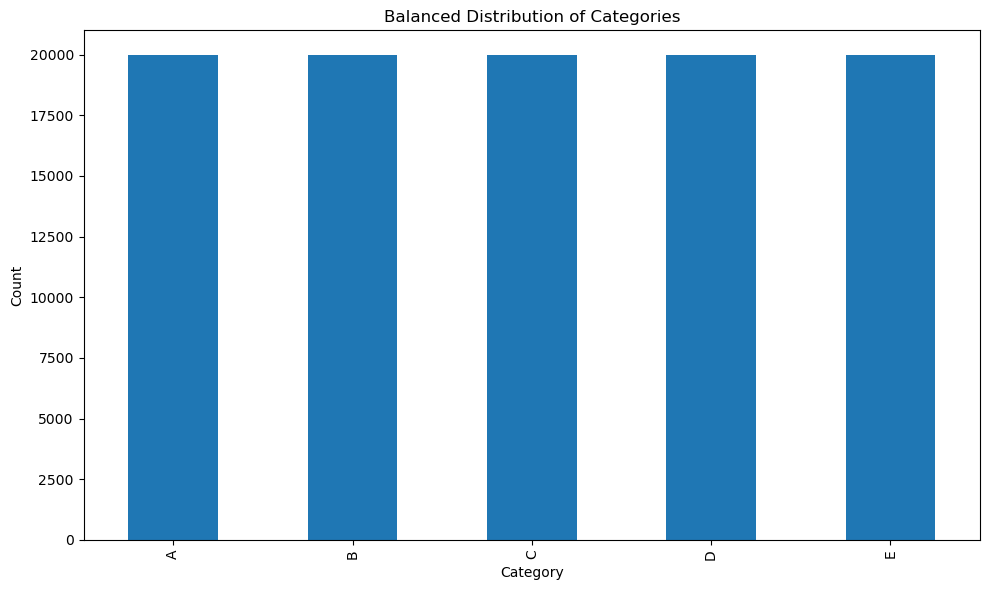

In [53]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Sample 20000 from each category
df_C_bal = pd.concat([
    df_C[df_C['yield_category'] == 'A'].sample(n=20000, random_state=42),
    df_C[df_C['yield_category'] == 'B'].sample(n=20000, random_state=42),
    df_C[df_C['yield_category'] == 'C'].sample(n=20000, random_state=42),
    df_C[df_C['yield_category'] == 'D'].sample(n=20000, random_state=42),
    df_C[df_C['yield_category'] == 'E'].sample(n=20000, random_state=42)
])

# Verify the new counts
print("New Value Counts:")
print(df_C_bal['yield_category'].value_counts())

# Visualize the balanced distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_C_bal['yield_category'].value_counts().plot(kind='bar')
plt.title('Balanced Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Save the balanced dataset if needed
# balanced_df_num.to_csv('balanced_dataset.csv', index=False)

In [55]:
df_C_bal.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare', 'yield_category'],
      dtype='object')

## Visualization

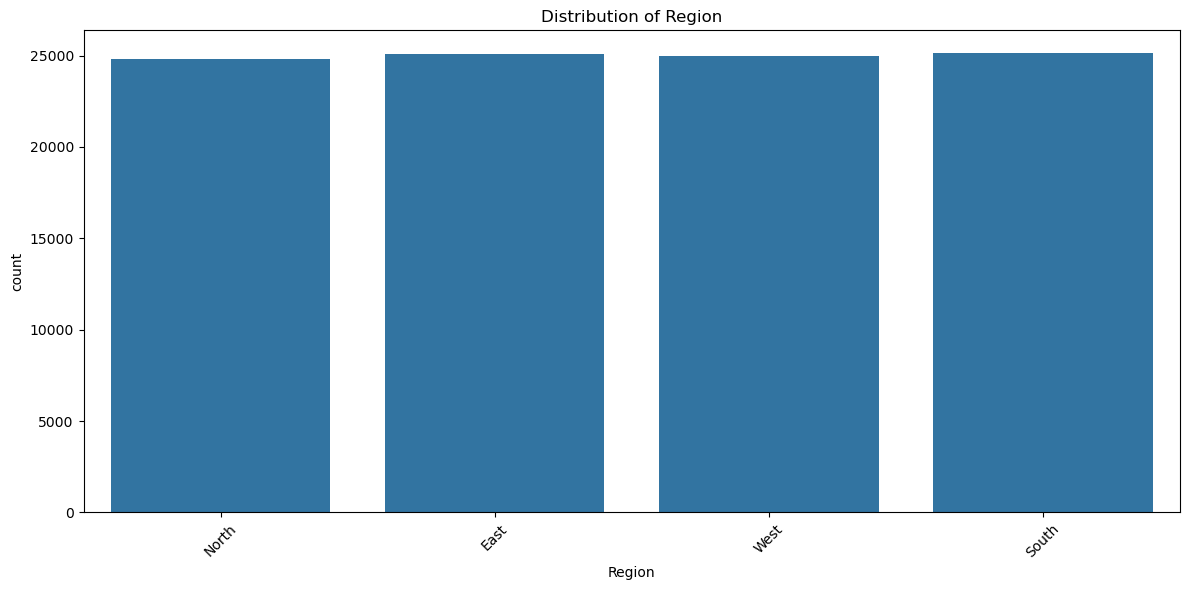


Value counts for Region:
Region
South    25128
East     25079
West     24960
North    24833
Name: count, dtype: int64

Percentage distribution:
Region
South    25.1
East     25.1
West     25.0
North    24.8
Name: proportion, dtype: float64 %
--------------------------------------------------


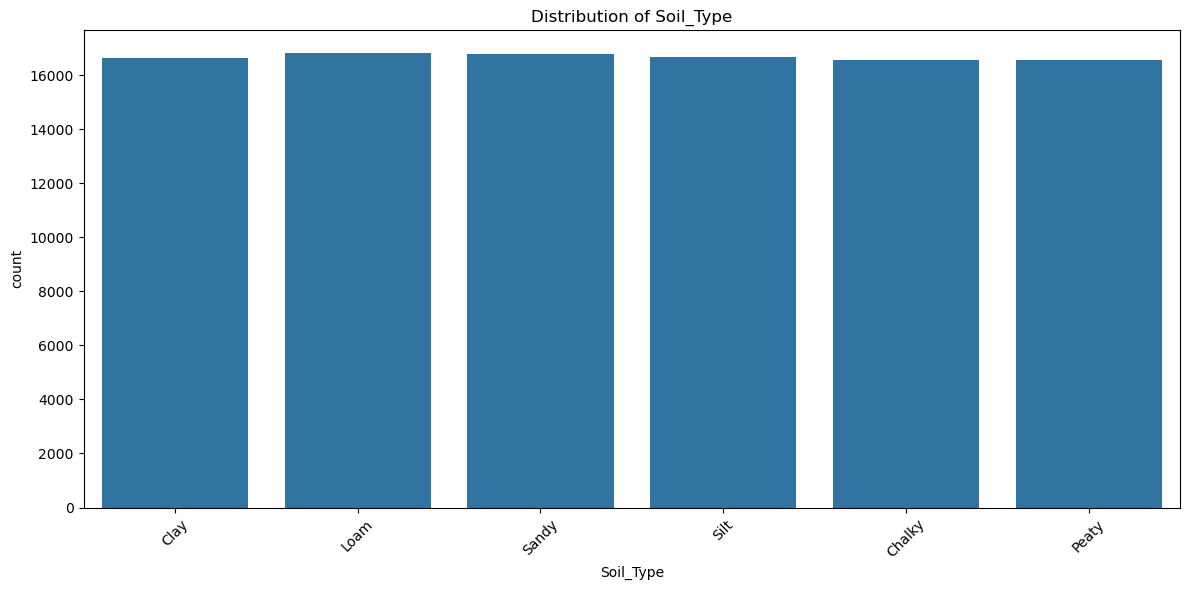


Value counts for Soil_Type:
Soil_Type
Loam      16819
Sandy     16766
Silt      16681
Clay      16629
Peaty     16559
Chalky    16546
Name: count, dtype: int64

Percentage distribution:
Soil_Type
Loam      16.8
Sandy     16.8
Silt      16.7
Clay      16.6
Peaty     16.6
Chalky    16.5
Name: proportion, dtype: float64 %
--------------------------------------------------


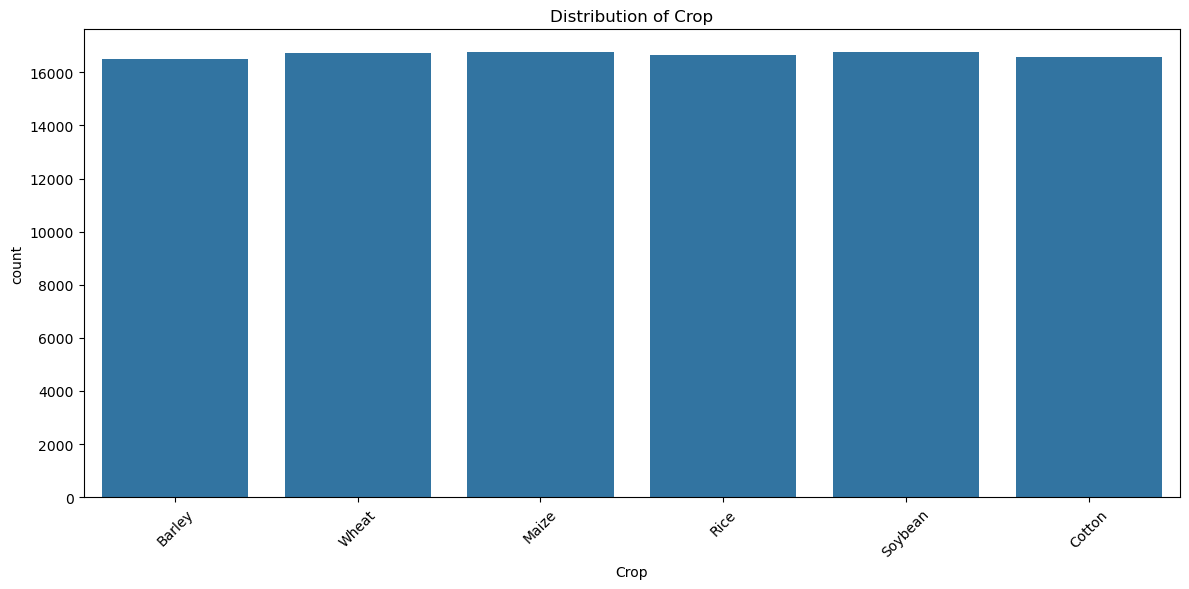


Value counts for Crop:
Crop
Maize      16778
Soybean    16752
Wheat      16710
Rice       16666
Cotton     16580
Barley     16514
Name: count, dtype: int64

Percentage distribution:
Crop
Maize      16.8
Soybean    16.8
Wheat      16.7
Rice       16.7
Cotton     16.6
Barley     16.5
Name: proportion, dtype: float64 %
--------------------------------------------------


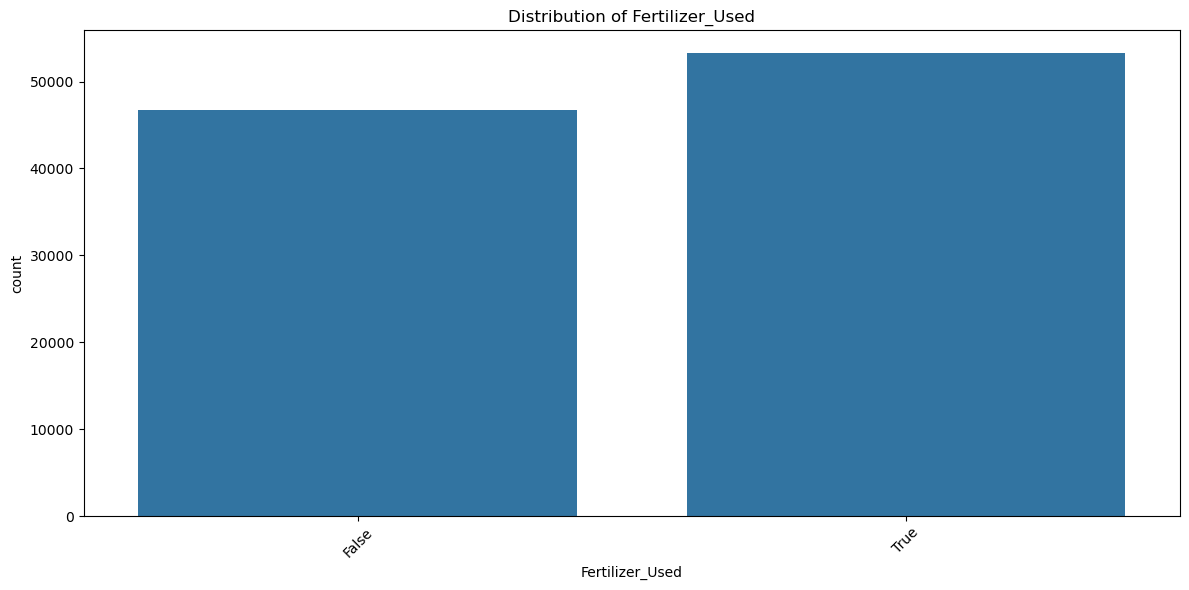


Value counts for Fertilizer_Used:
Fertilizer_Used
True     53241
False    46759
Name: count, dtype: int64

Percentage distribution:
Fertilizer_Used
True     53.2
False    46.8
Name: proportion, dtype: float64 %
--------------------------------------------------


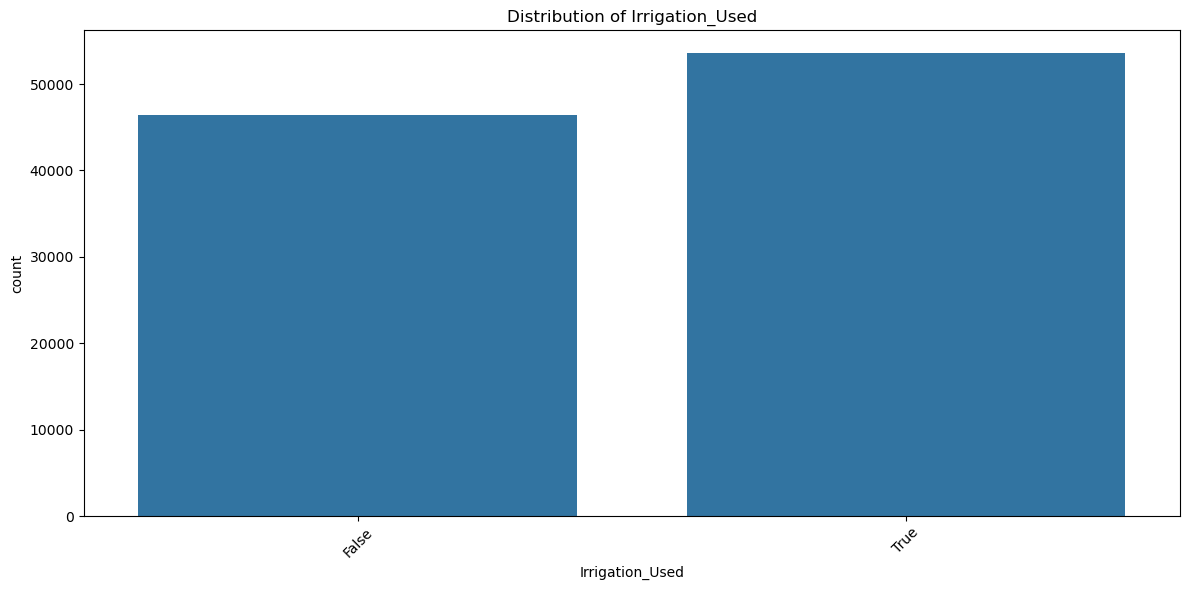


Value counts for Irrigation_Used:
Irrigation_Used
True     53544
False    46456
Name: count, dtype: int64

Percentage distribution:
Irrigation_Used
True     53.5
False    46.5
Name: proportion, dtype: float64 %
--------------------------------------------------


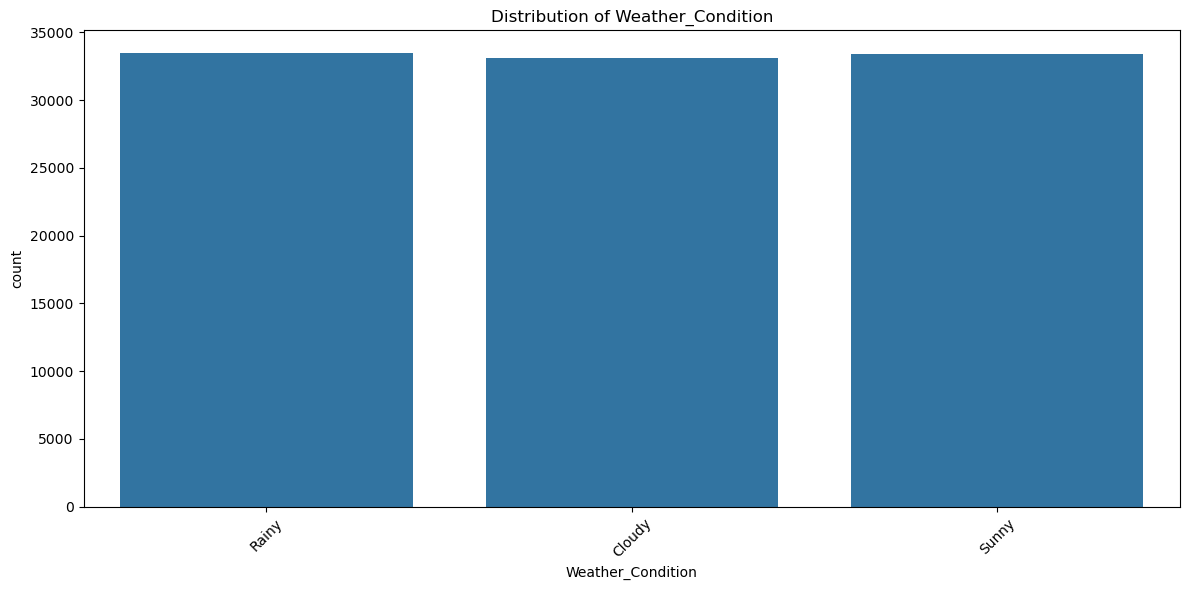


Value counts for Weather_Condition:
Weather_Condition
Rainy     33483
Sunny     33394
Cloudy    33123
Name: count, dtype: int64

Percentage distribution:
Weather_Condition
Rainy     33.5
Sunny     33.4
Cloudy    33.1
Name: proportion, dtype: float64 %
--------------------------------------------------


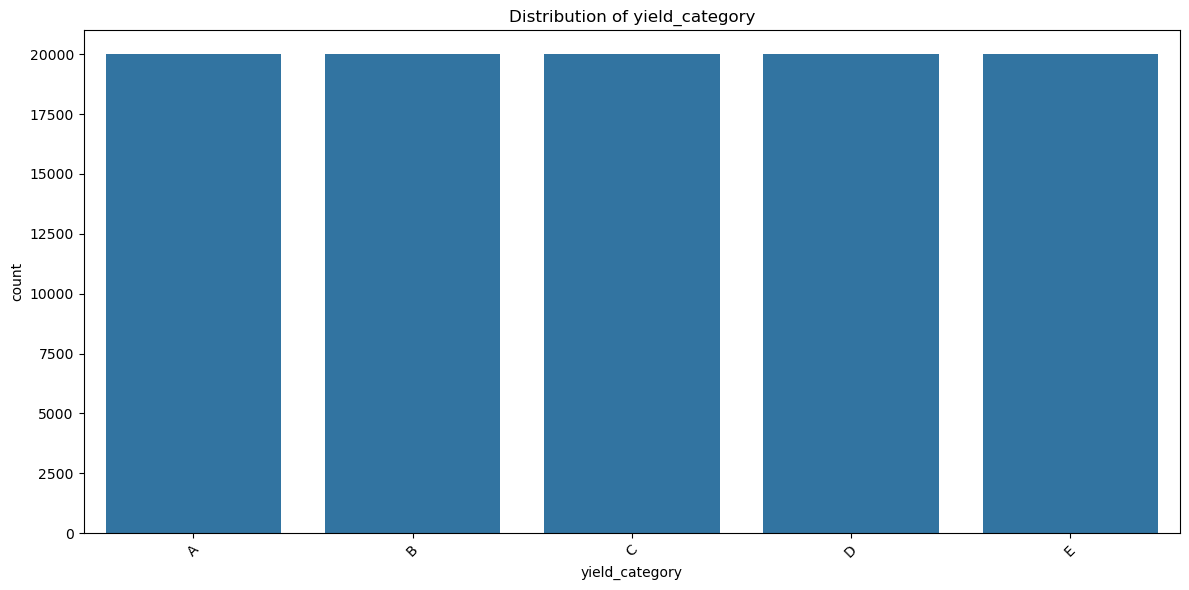


Value counts for yield_category:
yield_category
A    20000
B    20000
C    20000
D    20000
E    20000
Name: count, dtype: int64

Percentage distribution:
yield_category
A    20.0
B    20.0
C    20.0
D    20.0
E    20.0
Name: proportion, dtype: float64 %
--------------------------------------------------


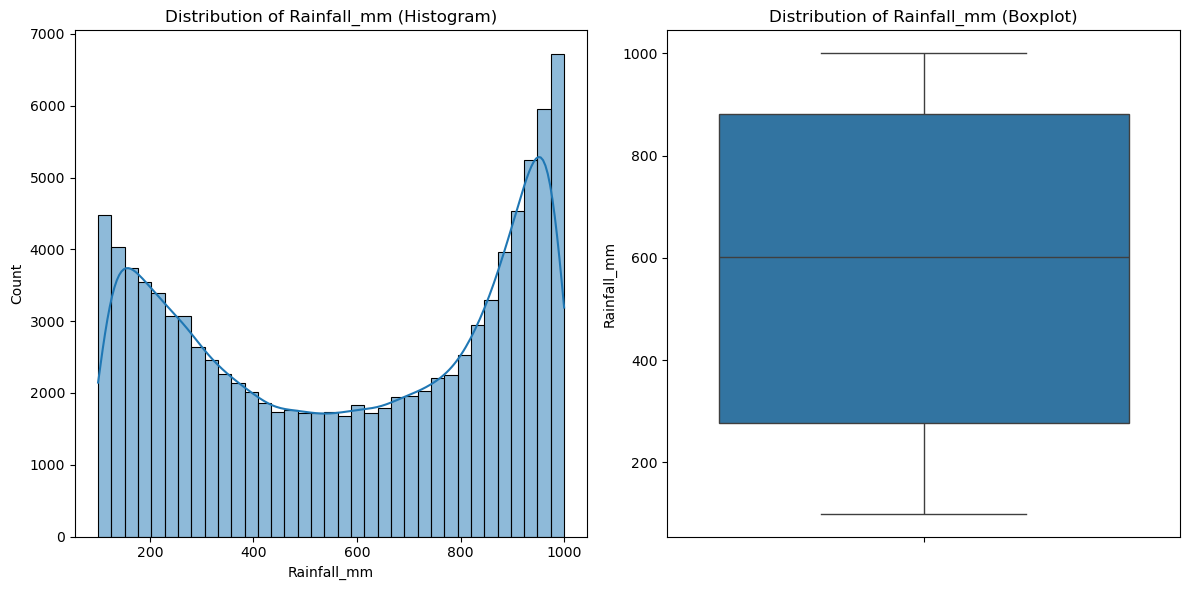


Descriptive statistics for Rainfall_mm:
count    100000.000000
mean        578.227136
std         303.408112
min         100.000896
25%         277.332970
50%         601.521620
75%         881.110709
max         999.996552
Name: Rainfall_mm, dtype: float64
--------------------------------------------------


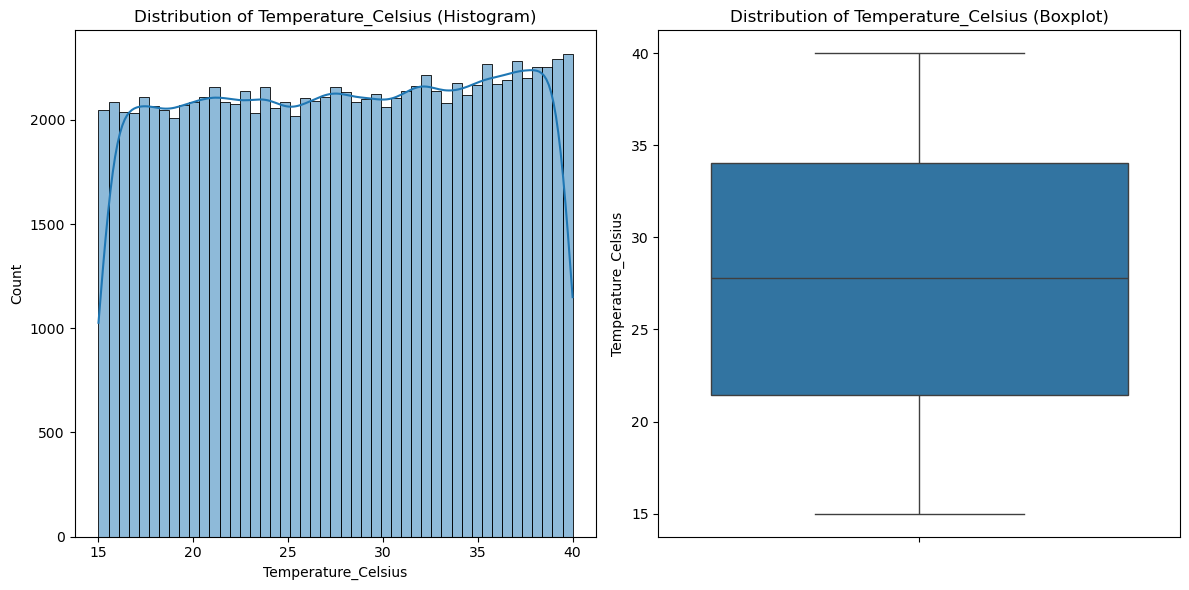


Descriptive statistics for Temperature_Celsius:
count    100000.000000
mean         27.698866
std           7.248334
min          15.000276
25%          21.421930
50%          27.772923
75%          34.032684
max          39.999933
Name: Temperature_Celsius, dtype: float64
--------------------------------------------------


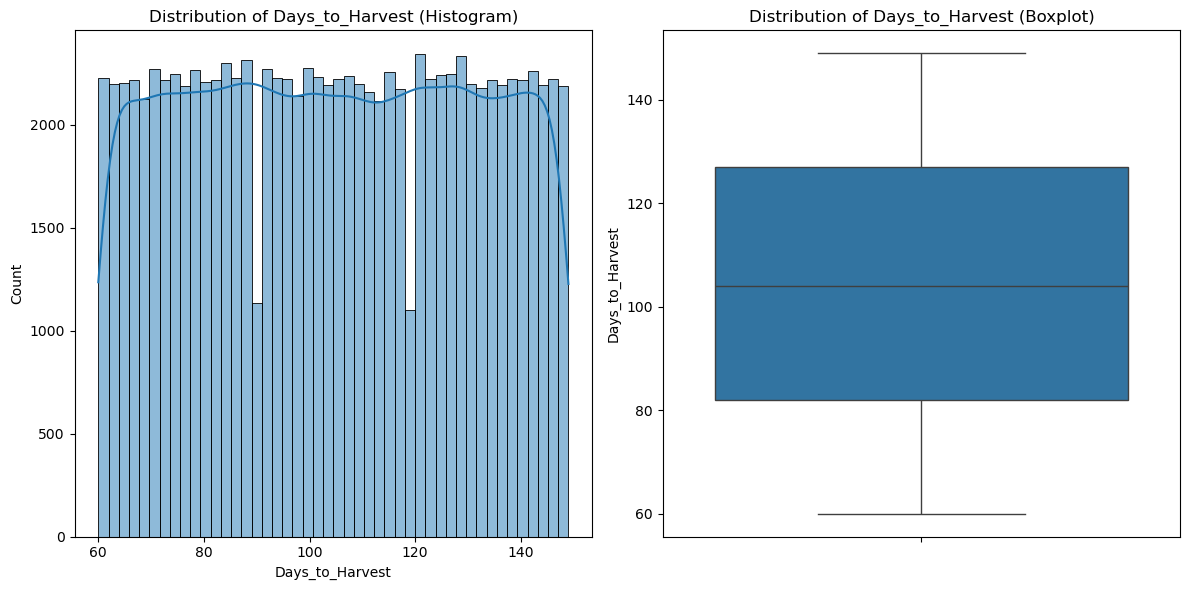


Descriptive statistics for Days_to_Harvest:
count    100000.00000
mean        104.49346
std          25.95016
min          60.00000
25%          82.00000
50%         104.00000
75%         127.00000
max         149.00000
Name: Days_to_Harvest, dtype: float64
--------------------------------------------------


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for all columns
def create_all_count_plots(df):
    # Categorical columns
    categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 
                       'Irrigation_Used', 'Weather_Condition', 'yield_category']
    
    # Numerical columns
    numerical_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
    
    # Plotting categorical variables
    for col in categorical_cols:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
        
        # Print value counts
        print(f"\nValue counts for {col}:")
        print(df[col].value_counts())
        print("\nPercentage distribution:")
        print(df[col].value_counts(normalize=True).round(3) * 100, '%')
        print("-"*50)
    
    # Plotting numerical variables
    for col in numerical_cols:
        plt.figure(figsize=(12, 6))
        
        # Create subplot with histogram and kde
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, kde=True)
        plt.title(f'Distribution of {col} (Histogram)')
        
        # Create subplot with boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, y=col)
        plt.title(f'Distribution of {col} (Boxplot)')
        
        plt.tight_layout()
        plt.show()
        
        # Print descriptive statistics
        print(f"\nDescriptive statistics for {col}:")
        print(df[col].describe())
        print("-"*50)

# Call the function
create_all_count_plots(df_C_bal)



## Summary of balanced dataFrame

In [59]:

# Create a summary DataFrame
summary_stats = pd.DataFrame({
    'Column': df_C_bal.columns,
    'Type': df_C_bal.dtypes,
    'Null_Count': df_C_bal.isnull().sum(),
    'Unique_Values': df_C_bal.nunique()
})

print("\nDataset Summary Statistics:")
print(summary_stats)
print("\n","*______________________________________________________________________*","\n")

# For categorical variables, show top 5 most frequent values
categorical_cols = ['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 
                       'Irrigation_Used', 'Weather_Condition', 'yield_category']
for col in categorical_cols:
    print(f"\nTop 5 most frequent values in {col}:")
    print(df_C_bal[col].value_counts().head())


Dataset Summary Statistics:
                                        Column     Type  Null_Count  \
Region                                  Region   object           0   
Soil_Type                            Soil_Type   object           0   
Crop                                      Crop   object           0   
Rainfall_mm                        Rainfall_mm  float64           0   
Temperature_Celsius        Temperature_Celsius  float64           0   
Fertilizer_Used                Fertilizer_Used     bool           0   
Irrigation_Used                Irrigation_Used     bool           0   
Weather_Condition            Weather_Condition   object           0   
Days_to_Harvest                Days_to_Harvest    int64           0   
Yield_tons_per_hectare  Yield_tons_per_hectare  float64           0   
yield_category                  yield_category   object           0   

                        Unique_Values  
Region                              4  
Soil_Type                           6 

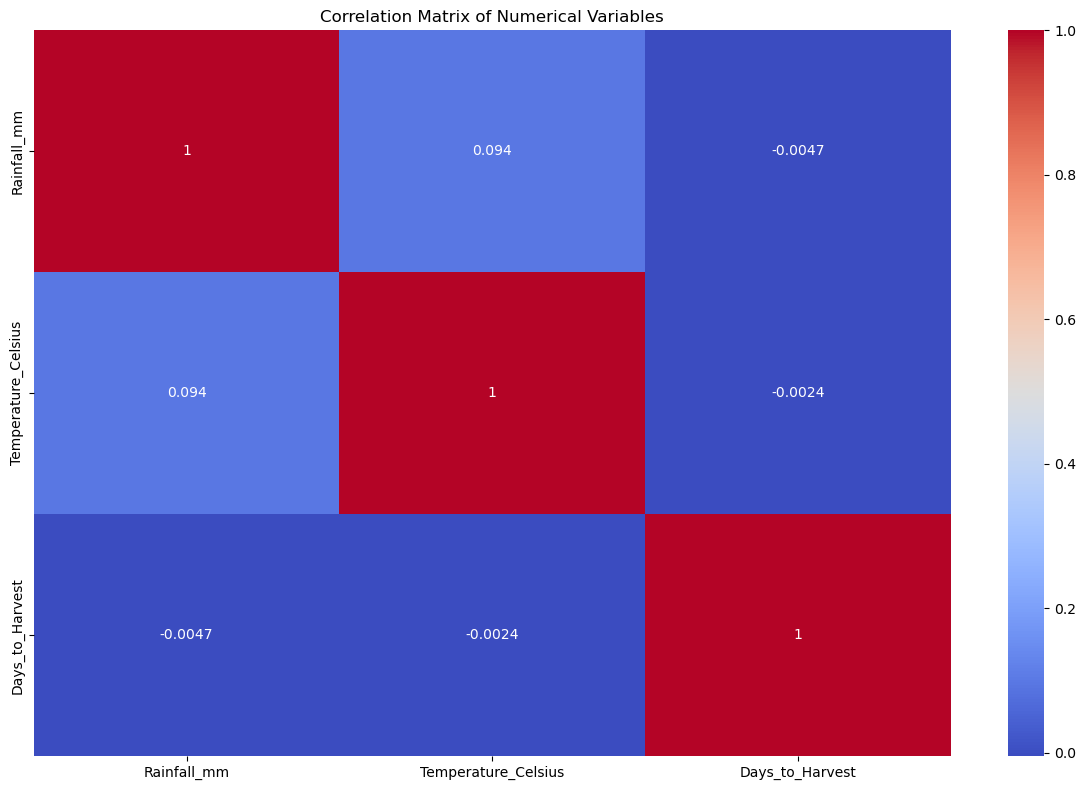

<Figure size 640x480 with 0 Axes>

In [61]:
# Additional analysis: Bivariate relationships
numerical_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
plt.figure(figsize=(12, 8))
sns.heatmap(df_C_bal[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()
plt.tight_layout()

## Preprocessing

In [63]:
df_C_P=df_C_bal.copy(deep=True)
df_C_P=df_C_P.drop('Yield_tons_per_hectare',axis=1)

In [60]:
display(HTML(df_C_P.head(10).to_html()))

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,yield_category
316867,North,Clay,Barley,996.904078,28.318049,True,True,Rainy,74,A
936108,North,Loam,Wheat,937.416954,24.918895,True,True,Rainy,74,A
297985,North,Clay,Wheat,952.995030,28.586141,True,True,Cloudy,82,A
74824,North,Sandy,Wheat,929.884147,36.243741,True,True,Cloudy,92,A
850145,North,Loam,Maize,890.492151,35.665375,True,True,Sunny,117,A
436828,East,Silt,Rice,870.131147,29.188007,True,True,Rainy,84,A
176094,West,Sandy,Soybean,977.383222,24.483362,True,True,Rainy,106,A
339870,West,Chalky,Cotton,835.166936,19.303574,True,True,Sunny,144,A
421217,East,Loam,Wheat,967.705284,19.652194,True,True,Cloudy,119,A
382968,South,Sandy,Wheat,933.995774,26.481394,True,True,Sunny,87,A


### Discretization

In [65]:

nominal_columns = df_C_P.select_dtypes(include=['object','bool']).columns.tolist()
if 'yield_category' in nominal_columns:
    nominal_columns.remove('yield_category')
print(nominal_columns)
for i in nominal_columns:
    if (df_C_P[i].dtype=='object'):
        print(i,"----",df_C_P[i].dtype,"----",df_C_P[i].unique())

['Region', 'Soil_Type', 'Crop', 'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition']
Region ---- object ---- ['North' 'East' 'West' 'South']
Soil_Type ---- object ---- ['Clay' 'Loam' 'Sandy' 'Silt' 'Chalky' 'Peaty']
Crop ---- object ---- ['Barley' 'Wheat' 'Maize' 'Rice' 'Soybean' 'Cotton']
Weather_Condition ---- object ---- ['Rainy' 'Cloudy' 'Sunny']


In [67]:
df_C_P=pd.get_dummies(df_C_P,columns=nominal_columns,dtype=float)
display(HTML(df_C_P.head(5).to_html()))
print(df_C_P.columns)

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,yield_category,Region_East,Region_North,Region_South,Region_West,Soil_Type_Chalky,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Barley,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_False,Fertilizer_Used_True,Irrigation_Used_False,Irrigation_Used_True,Weather_Condition_Cloudy,Weather_Condition_Rainy,Weather_Condition_Sunny
316867,996.904078,28.318049,74,A,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
936108,937.416954,24.918895,74,A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
297985,952.995030,28.586141,82,A,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
74824,929.884147,36.243741,92,A,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
850145,890.492151,35.665375,117,A,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


Index(['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',
       'yield_category', 'Region_East', 'Region_North', 'Region_South',
       'Region_West', 'Soil_Type_Chalky', 'Soil_Type_Clay', 'Soil_Type_Loam',
       'Soil_Type_Peaty', 'Soil_Type_Sandy', 'Soil_Type_Silt', 'Crop_Barley',
       'Crop_Cotton', 'Crop_Maize', 'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat',
       'Fertilizer_Used_False', 'Fertilizer_Used_True',
       'Irrigation_Used_False', 'Irrigation_Used_True',
       'Weather_Condition_Cloudy', 'Weather_Condition_Rainy',
       'Weather_Condition_Sunny'],
      dtype='object')


In [69]:
# making n-1 columns
df_C_P=df_C_P.drop('Region_East',axis=1)
df_C_P=df_C_P.drop('Soil_Type_Chalky',axis=1)
df_C_P=df_C_P.drop('Crop_Barley',axis=1)
df_C_P=df_C_P.drop('Weather_Condition_Cloudy',axis=1)
df_C_P=df_C_P.drop('Fertilizer_Used_False',axis=1)
df_C_P=df_C_P.drop('Irrigation_Used_False',axis=1)

In [71]:
print(df_C_P.columns)

Index(['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',
       'yield_category', 'Region_North', 'Region_South', 'Region_West',
       'Soil_Type_Clay', 'Soil_Type_Loam', 'Soil_Type_Peaty',
       'Soil_Type_Sandy', 'Soil_Type_Silt', 'Crop_Cotton', 'Crop_Maize',
       'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat', 'Fertilizer_Used_True',
       'Irrigation_Used_True', 'Weather_Condition_Rainy',
       'Weather_Condition_Sunny'],
      dtype='object')


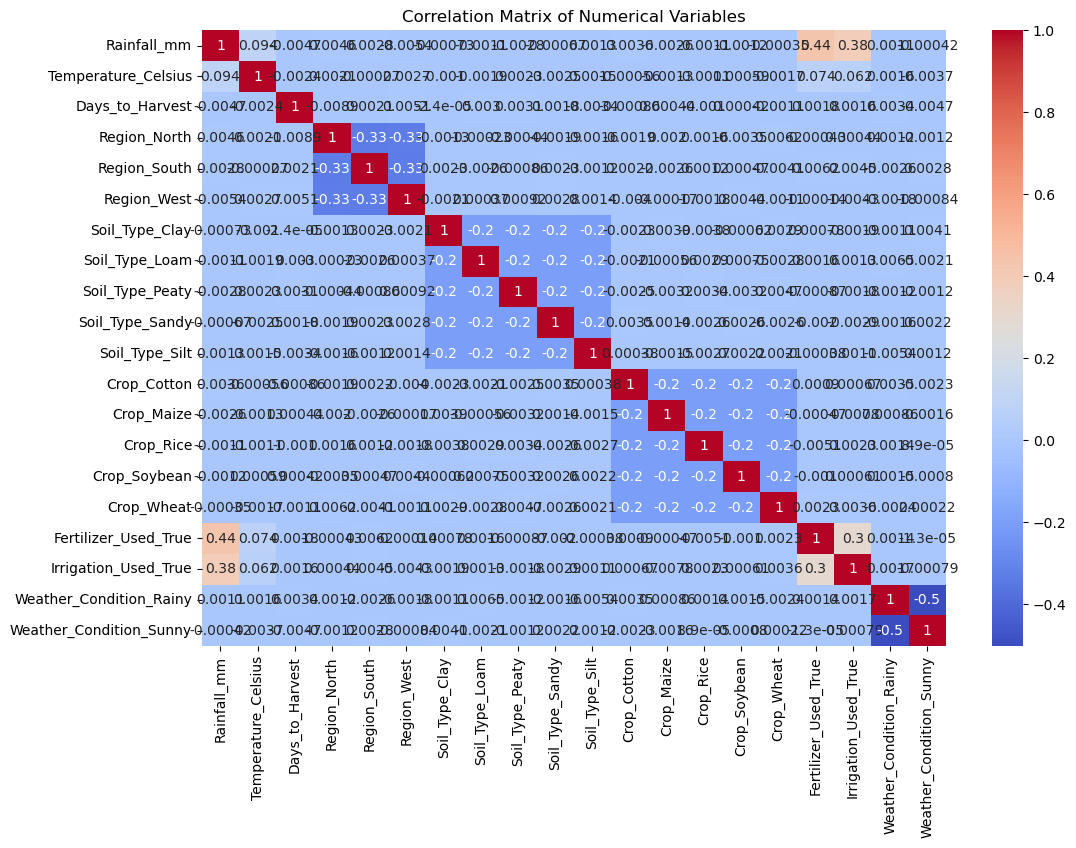

In [73]:
main_cols = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest', 'Region_North', 'Region_South', 'Region_West',
       'Soil_Type_Clay', 'Soil_Type_Loam', 'Soil_Type_Peaty',
       'Soil_Type_Sandy', 'Soil_Type_Silt', 'Crop_Cotton', 'Crop_Maize',
       'Crop_Rice', 'Crop_Soybean', 'Crop_Wheat', 'Fertilizer_Used_True',
       'Irrigation_Used_True', 'Weather_Condition_Rainy',
       'Weather_Condition_Sunny']
plt.figure(figsize=(12, 8))
sns.heatmap(df_C_P[main_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')

plt.show()
#plt.tight_layout()
   
# Save as JPEG
plt.savefig('Corr_before_1.pdf', dpi=300, bbox_inches='tight')
plt.close()

In [75]:
for i in df_C_P.columns:
    print(i,"------",df_C_P[i].dtypes)

Rainfall_mm ------ float64
Temperature_Celsius ------ float64
Days_to_Harvest ------ int64
yield_category ------ object
Region_North ------ float64
Region_South ------ float64
Region_West ------ float64
Soil_Type_Clay ------ float64
Soil_Type_Loam ------ float64
Soil_Type_Peaty ------ float64
Soil_Type_Sandy ------ float64
Soil_Type_Silt ------ float64
Crop_Cotton ------ float64
Crop_Maize ------ float64
Crop_Rice ------ float64
Crop_Soybean ------ float64
Crop_Wheat ------ float64
Fertilizer_Used_True ------ float64
Irrigation_Used_True ------ float64
Weather_Condition_Rainy ------ float64
Weather_Condition_Sunny ------ float64


### Normalization

In [77]:
# normalizing all data excluding Yeild
#min-max
for i in df_C_P.columns:
    if i!="yield_category":
        df_C_P[i]=(df_C_P[i]-df_C_P[i].min())/(df_C_P[i].max()-df_C_P[i].min())

display(HTML(df_C_P.head(5).to_html()))


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,yield_category,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_True,Irrigation_Used_True,Weather_Condition_Rainy,Weather_Condition_Sunny
316867,0.996564,0.532718,0.157303,A,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
936108,0.930467,0.396750,0.157303,A,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
297985,0.947776,0.543442,0.247191,A,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
74824,0.922097,0.849750,0.359551,A,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
850145,0.878328,0.826615,0.640449,A,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


## Balanced original data and summary

In [79]:
summary_stats_B = pd.DataFrame({
    'Column': df_C_bal.columns,
    'Type': df_C_bal.dtypes,
    'Null_Count': df_C_bal.isnull().sum(),
    'Unique_Values': df_C_bal.nunique()
})

print("\nDataset Summary Statistics:")
print(summary_stats_B)
display(HTML(df_C_bal.head(10).to_html()))



Dataset Summary Statistics:
                                        Column     Type  Null_Count  \
Region                                  Region   object           0   
Soil_Type                            Soil_Type   object           0   
Crop                                      Crop   object           0   
Rainfall_mm                        Rainfall_mm  float64           0   
Temperature_Celsius        Temperature_Celsius  float64           0   
Fertilizer_Used                Fertilizer_Used     bool           0   
Irrigation_Used                Irrigation_Used     bool           0   
Weather_Condition            Weather_Condition   object           0   
Days_to_Harvest                Days_to_Harvest    int64           0   
Yield_tons_per_hectare  Yield_tons_per_hectare  float64           0   
yield_category                  yield_category   object           0   

                        Unique_Values  
Region                              4  
Soil_Type                           6 

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,yield_category
316867,North,Clay,Barley,996.904078,28.318049,True,True,Rainy,74,8.528437,A
936108,North,Loam,Wheat,937.416954,24.918895,True,True,Rainy,74,8.055175,A
297985,North,Clay,Wheat,952.995030,28.586141,True,True,Cloudy,82,9.118627,A
74824,North,Sandy,Wheat,929.884147,36.243741,True,True,Cloudy,92,9.054847,A
850145,North,Loam,Maize,890.492151,35.665375,True,True,Sunny,117,8.258445,A
436828,East,Silt,Rice,870.131147,29.188007,True,True,Rainy,84,8.399719,A
176094,West,Sandy,Soybean,977.383222,24.483362,True,True,Rainy,106,8.230102,A
339870,West,Chalky,Cotton,835.166936,19.303574,True,True,Sunny,144,8.076766,A
421217,East,Loam,Wheat,967.705284,19.652194,True,True,Cloudy,119,8.321128,A
382968,South,Sandy,Wheat,933.995774,26.481394,True,True,Sunny,87,8.471515,A


## Preprossed data and Summary

In [85]:

# Create a summary DataFrame
summary_stats_P = pd.DataFrame({
    'Column': df_C_P.columns,
    'Type': df_C_P.dtypes,
    'Null_Count': df_C_P.isnull().sum(),
    'Unique_Values': df_C_P.nunique()
})

print("\nDataset Summary Statistics:")
print(summary_stats_P)
display(HTML(df_C_P.head(5).to_html()))


Dataset Summary Statistics:
                                          Column     Type  Null_Count  \
Rainfall_mm                          Rainfall_mm  float64           0   
Temperature_Celsius          Temperature_Celsius  float64           0   
Days_to_Harvest                  Days_to_Harvest  float64           0   
yield_category                    yield_category    int64           0   
Region_North                        Region_North  float64           0   
Region_South                        Region_South  float64           0   
Region_West                          Region_West  float64           0   
Soil_Type_Clay                    Soil_Type_Clay  float64           0   
Soil_Type_Loam                    Soil_Type_Loam  float64           0   
Soil_Type_Peaty                  Soil_Type_Peaty  float64           0   
Soil_Type_Sandy                  Soil_Type_Sandy  float64           0   
Soil_Type_Silt                    Soil_Type_Silt  float64           0   
Crop_Cotton           

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,yield_category,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_True,Irrigation_Used_True,Weather_Condition_Rainy,Weather_Condition_Sunny
316867,0.996564,0.532718,0.157303,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
936108,0.930467,0.396750,0.157303,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
297985,0.947776,0.543442,0.247191,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
74824,0.922097,0.849750,0.359551,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
850145,0.878328,0.826615,0.640449,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


## MODELS

#### for preprocessed data Encoding

In [83]:
# encoding the label
from sklearn import preprocessing
# defining labels
y=df_C_P["yield_category"]
label_en=preprocessing.LabelEncoder()
#fitting
le=label_en.fit(y)

y_en=le.transform(y)
print(y_en)
#replacing the label "classification" with encoded values
df_C_P["yield_category"]=y_en

[0 0 0 ... 4 4 4]


In [87]:
df_C_P["yield_category"].unique()

array([0, 1, 2, 3, 4])

In [89]:
df_C_P.head(10)

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,yield_category,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,...,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_True,Irrigation_Used_True,Weather_Condition_Rainy,Weather_Condition_Sunny
316867,0.996564,0.532718,0.157303,0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
936108,0.930467,0.396750,0.157303,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
297985,0.947776,0.543442,0.247191,0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
74824,0.922097,0.849750,0.359551,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
850145,0.878328,0.826615,0.640449,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
436828,0.855704,0.567517,0.269663,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
176094,0.974874,0.379329,0.516854,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
339870,0.816855,0.172134,0.943820,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
421217,0.964121,0.186079,0.662921,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
382968,0.926665,0.459251,0.303371,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


### decision trees

In [91]:
x = df_C_P.drop('yield_category', axis=1)
x

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Fertilizer_Used_True,Irrigation_Used_True,Weather_Condition_Rainy,Weather_Condition_Sunny
316867,0.996564,0.532718,0.157303,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
936108,0.930467,0.396750,0.157303,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
297985,0.947776,0.543442,0.247191,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
74824,0.922097,0.849750,0.359551,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
850145,0.878328,0.826615,0.640449,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93910,0.153456,0.777775,0.674157,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
850955,0.060030,0.712512,0.573034,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
849648,0.038979,0.510676,0.044944,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
660956,0.052183,0.119847,0.168539,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.utils import shuffle

# Initialize the classifier with the same parameters
clf = DecisionTreeClassifier(criterion='log_loss', 
                           max_depth=4,
                           max_leaf_nodes=5,
                           ccp_alpha=0.0,
                           min_samples_split=2,
                           min_impurity_decrease=0.02)

# Shuffle the data
x, y = shuffle(x, y, random_state=42)

# Split the data into training and testing sets (typically 70-30 or 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')

print('By Holdout Validation: accuracy = ', acc, 
      ', precision = ', pre, 
      ', recall = ', rec, 
      ', auc = ', auc)

By Holdout Validation: accuracy =  0.58695 , precision =  0.47522719025064564 , recall =  0.58989891185769 , auc =  0.8566009580545243


In [95]:

clf = DecisionTreeClassifier(criterion='entropy', 
                           max_depth=4,
                           max_leaf_nodes=5,
                           ccp_alpha=0.0,
                           min_samples_split=2,
                           min_impurity_decrease=0.02)

# Shuffle the data
x, y = shuffle(x, y, random_state=42)

# Split the data into training and testing sets (typically 70-30 or 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_pred_proba, average='macro', multi_class='ovr')

print('By Holdout Validation: accuracy = ', acc, 
      ', precision = ', pre, 
      ', recall = ', rec, 
      ', auc = ', auc)

By Holdout Validation: accuracy =  0.58675 , precision =  0.4717305592187868 , recall =  0.5885746149049111 , auc =  0.8578047278339183


### RandomForest

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import numpy as np

# Define parameter grid
param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'ccp_alpha': [0, 0.01, 0.05, 0.1]
}

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Function to evaluate a model using AUC score
def evaluate_model(clf, X, y):
    y_pred_proba = clf.predict_proba(X)
    return roc_auc_score(y, y_pred_proba, average='macro', multi_class='ovr')

# Perform grid search manually
best_score = -np.inf
best_params = None
best_clf = None

# Generate all parameter combinations
from itertools import product
param_combinations = [dict(zip(param_grid.keys(), v)) for v in product(*param_grid.values())]

# Perform grid search
for params in param_combinations:
    # Create and train model with current parameters
    clf = DecisionTreeClassifier(**params)
    clf.fit(X_train, y_train)
    
    # Evaluate model
    score = evaluate_model(clf, X_test, y_test)
    
    # Update best parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params
        best_clf = clf

# Print results
print('Best parameters found:', best_params)
print('Best AUC score:', best_score)

# Retrain best model on full training data
final_clf = DecisionTreeClassifier(**best_params)
final_clf.fit(X_train, y_train)

# Final evaluation on test set
final_auc = evaluate_model(final_clf, X_test, y_test)
print('Final holdout validation AUC:', final_auc)

Best parameters found: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'ccp_alpha': 0}
Best AUC score: 0.9579823395514507
Final holdout validation AUC: 0.957871902232165


### XGBoost

In [99]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import pandas as pd

# Prepare the data 
y = df_C_P['yield_category']
X = df_C_P.drop('yield_category', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to training data only
ros = SMOTE(k_neighbors=2, random_state=10)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Define parameter grid
xgb_param_grid = {
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 0.9],
    'learning_rate': [0.1],
}

# Create and fit GridSearchCV
xgb_grid = GridSearchCV(
    xgb.XGBClassifier(
        objective='multi:softproba',
        random_state=42,
        eval_metric='mlogloss'  # Removed use_label_encoder parameter
    ),
    xgb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

# Fit the model
xgb_grid.fit(X_resampled, y_resampled)

# Print best parameters and CV score
print("\nBest XGBoost Parameters:", xgb_grid.best_params_)
print("Best Cross-validation Score:", xgb_grid.best_score_)

# Get best model
best_model = xgb_grid.best_estimator_

# Evaluate on hold-out test set
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='macro')

print("\nHold-out Test Set Evaluation:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 5 Most Important Features:")
print(feature_importance.head())


Best XGBoost Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.8}
Best Cross-validation Score: 0.8112969666708277

Hold-out Test Set Evaluation:
Accuracy: 0.8128
Precision: 0.8113

Top 5 Most Important Features:
                 feature  importance
16  Fertilizer_Used_True    0.341269
0            Rainfall_mm    0.332807
17  Irrigation_Used_True    0.229413
1    Temperature_Celsius    0.015769
10        Soil_Type_Silt    0.006420


In [115]:
# Essential imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           roc_auc_score, f1_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Added this import
import xgboost as xgb  # Added this import
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
def evaluate_model(clf, x_test, y_test, model_name, params, id):
    """
    Comprehensive model evaluation function that calculates multiple metrics
    and generates visualizations
    """
    # Basic predictions and probabilities
    y_pred_proba = clf.predict_proba(x_test)
    y_pred = clf.predict(x_test)
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='micro'),
        'recall': recall_score(y_test, y_pred, average='micro'),
        'f1': f1_score(y_test, y_pred, average='micro'),
        'auc': roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
    }
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Feature importance if available
    if hasattr(clf, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': x_test.columns,
            'importance': clf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
        plt.title(f'Top 10 Feature Importance - {model_name}')
        plt.show()
    
    return {
        'id': id,
        'model': model_name,
        'params': params,
        **metrics
    }

In [119]:
# Prepare data
def prepare_data(df, target_col='yield_category'):
    """
    Prepare data for modeling including scaling and SMOTE
    """
    # Split features and target
    y = df[target_col]
    X = df.drop(target_col, axis=1)
    
    # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Apply SMOTE for imbalanced data
    smote = SMOTE(k_neighbors=2, random_state=10)
    X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)
    
    return X_resampled, y_resampled, X_test_scaled, y_test

# Prepare the data
X_resampled, y_resampled, X_test_scaled, y_test = prepare_data(df_C_P)


Model 1: Random Forest
Parameters: {'n_estimators': 50, 'max_samples': 0.7}
Metrics:
accuracy: 0.8080
precision: 0.8075
recall: 0.8080
f1: 0.8071
auc: 0.9641


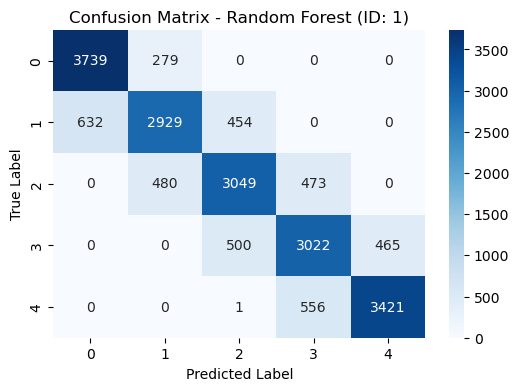

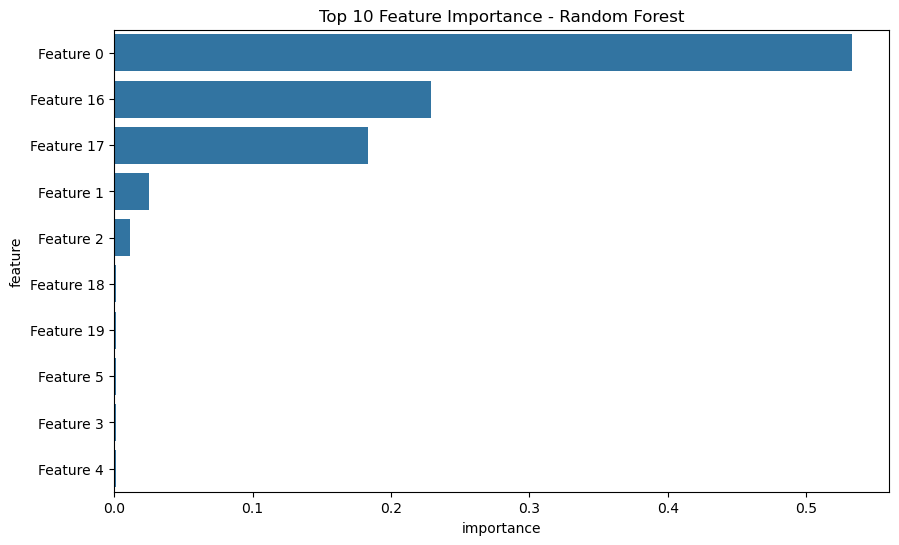


Model 2: Random Forest
Parameters: {'n_estimators': 50, 'max_samples': 0.8}
Metrics:
accuracy: 0.8081
precision: 0.8075
recall: 0.8081
f1: 0.8070
auc: 0.9642


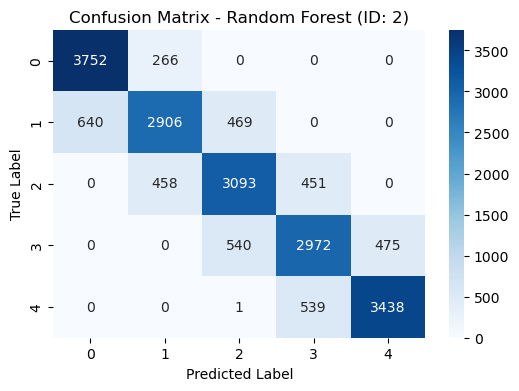

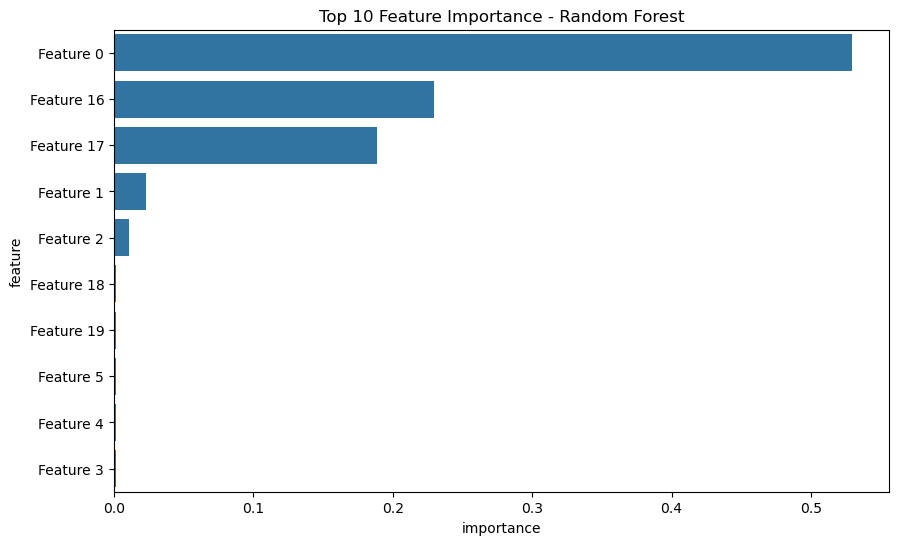


Model 3: Random Forest
Parameters: {'n_estimators': 50, 'max_samples': 0.9}
Metrics:
accuracy: 0.8073
precision: 0.8070
recall: 0.8073
f1: 0.8064
auc: 0.9638


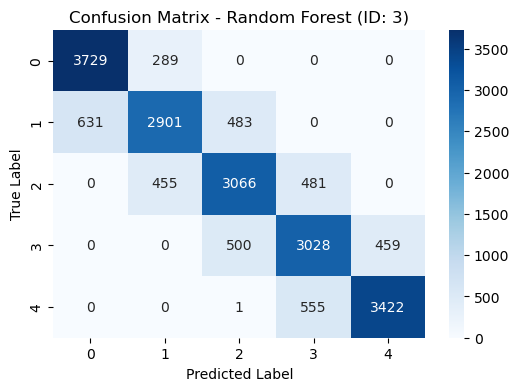

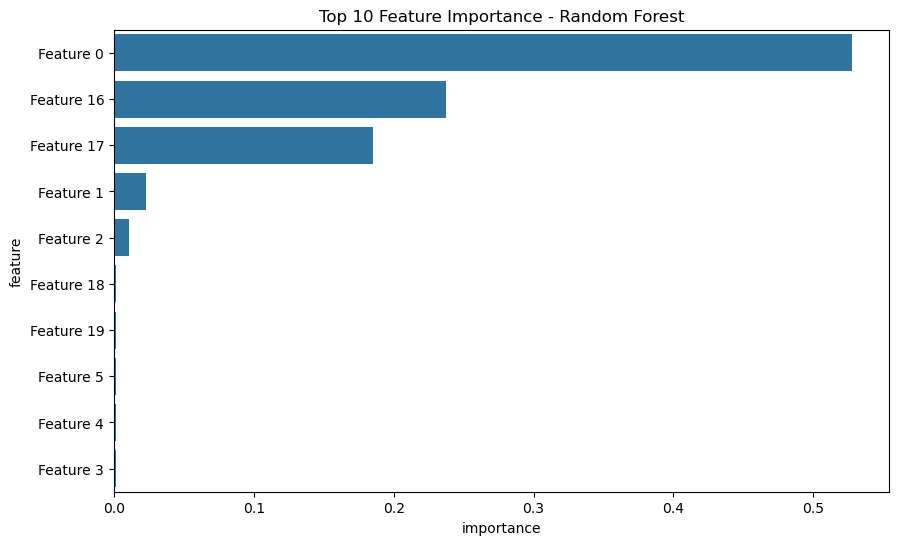


Model 4: Random Forest
Parameters: {'n_estimators': 50, 'max_samples': 1}
Metrics:
accuracy: 0.1989
precision: 0.0396
recall: 0.1989
f1: 0.0660
auc: 0.5000


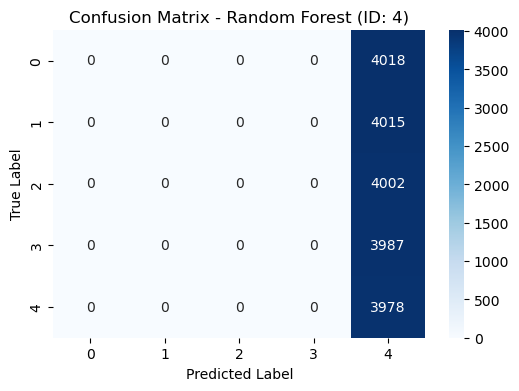

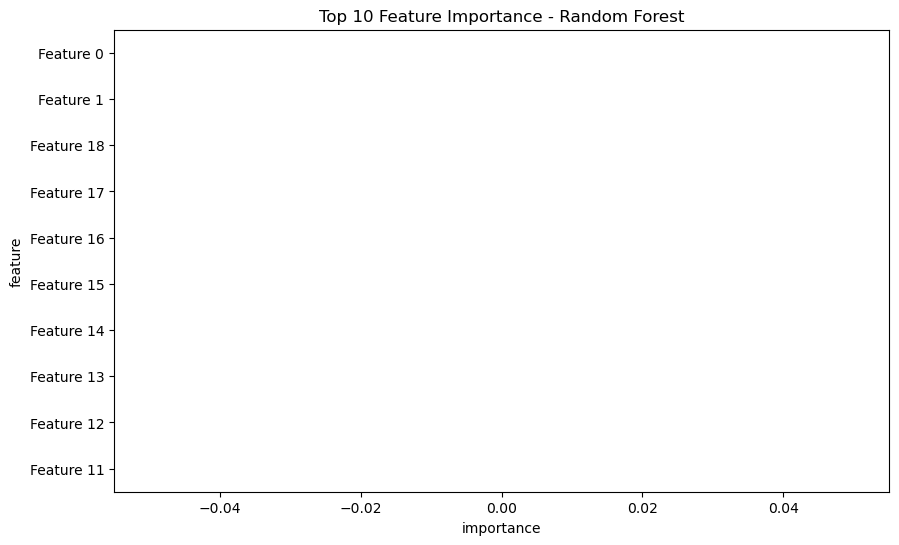


Model 5: Random Forest
Parameters: {'n_estimators': 100, 'max_samples': 0.7}
Metrics:
accuracy: 0.8080
precision: 0.8072
recall: 0.8080
f1: 0.8070
auc: 0.9645


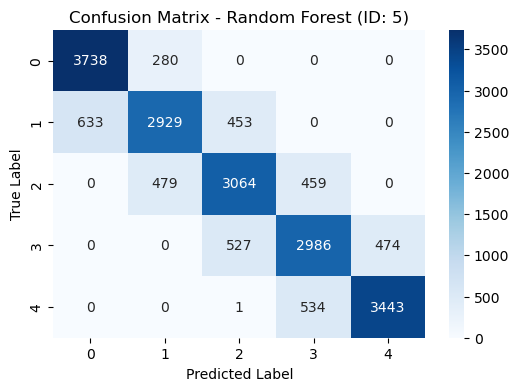

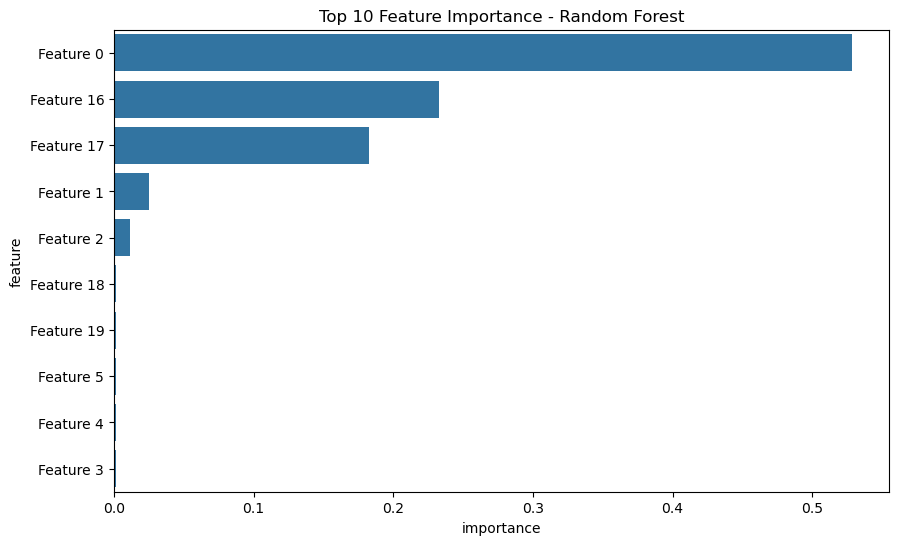


Model 6: Random Forest
Parameters: {'n_estimators': 100, 'max_samples': 0.8}
Metrics:
accuracy: 0.8072
precision: 0.8065
recall: 0.8072
f1: 0.8061
auc: 0.9644


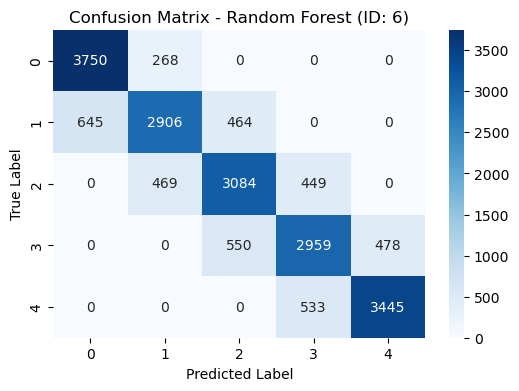

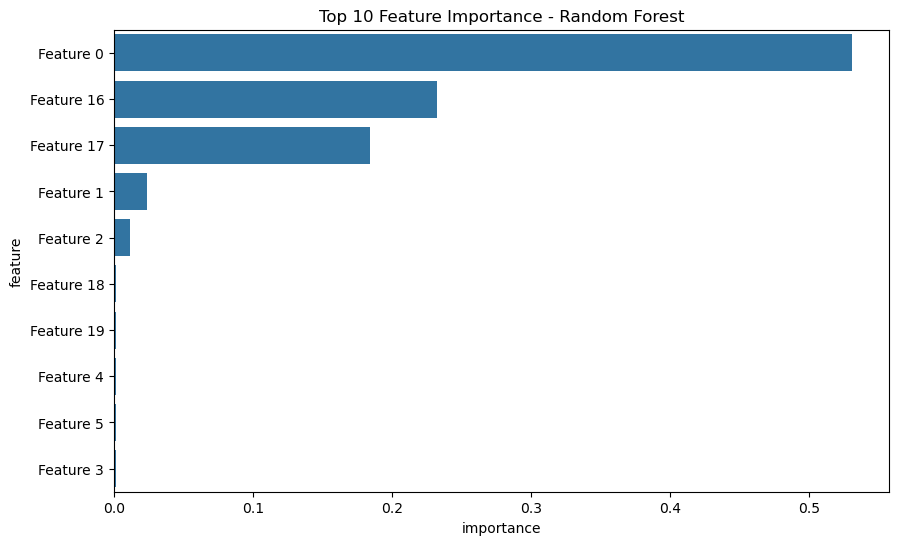


Model 7: Random Forest
Parameters: {'n_estimators': 100, 'max_samples': 0.9}
Metrics:
accuracy: 0.8066
precision: 0.8060
recall: 0.8066
f1: 0.8056
auc: 0.9642


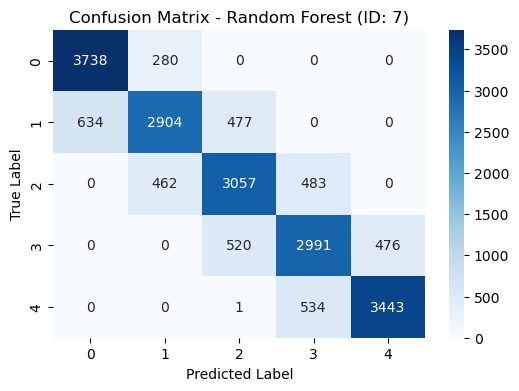

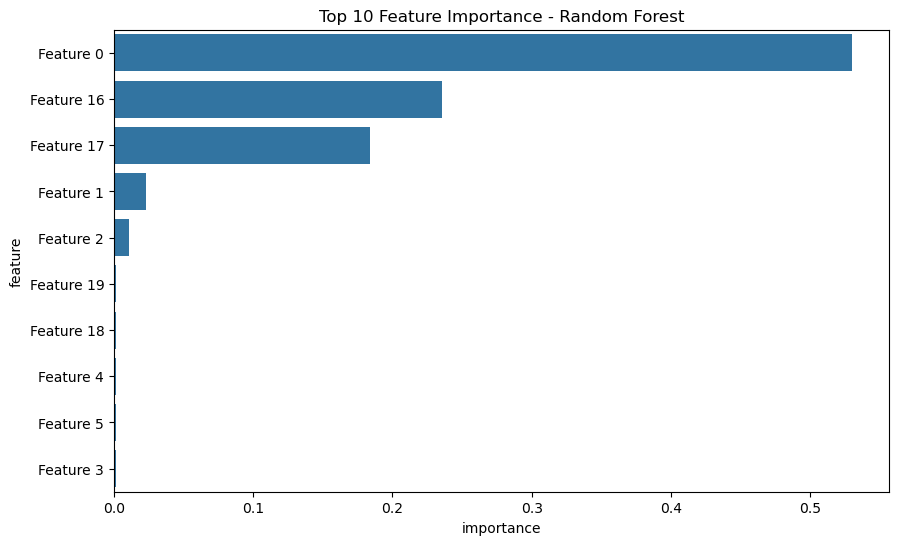


Model 8: Random Forest
Parameters: {'n_estimators': 100, 'max_samples': 1}
Metrics:
accuracy: 0.1993
precision: 0.0397
recall: 0.1993
f1: 0.0663
auc: 0.5000


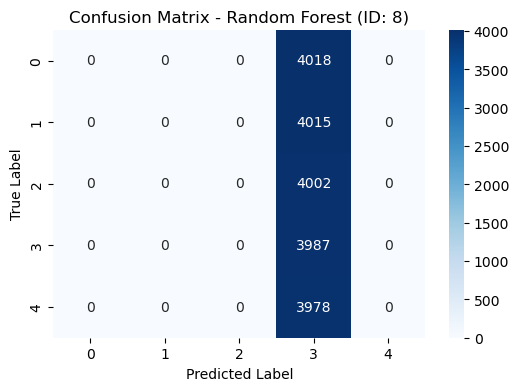

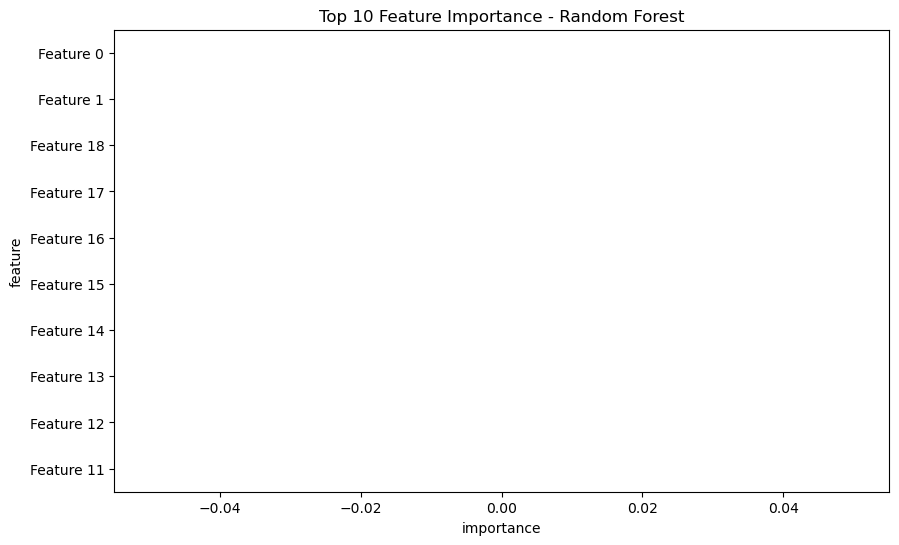


Model 9: Random Forest
Parameters: {'n_estimators': 150, 'max_samples': 0.7}
Metrics:
accuracy: 0.8069
precision: 0.8061
recall: 0.8069
f1: 0.8059
auc: 0.9646


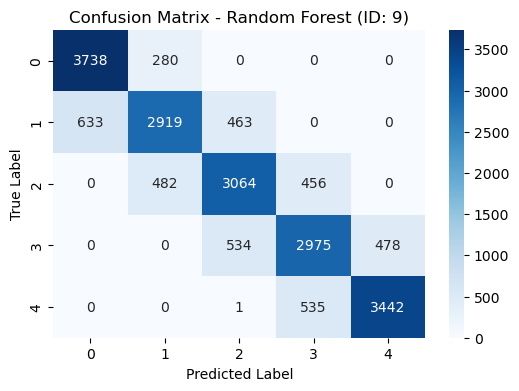

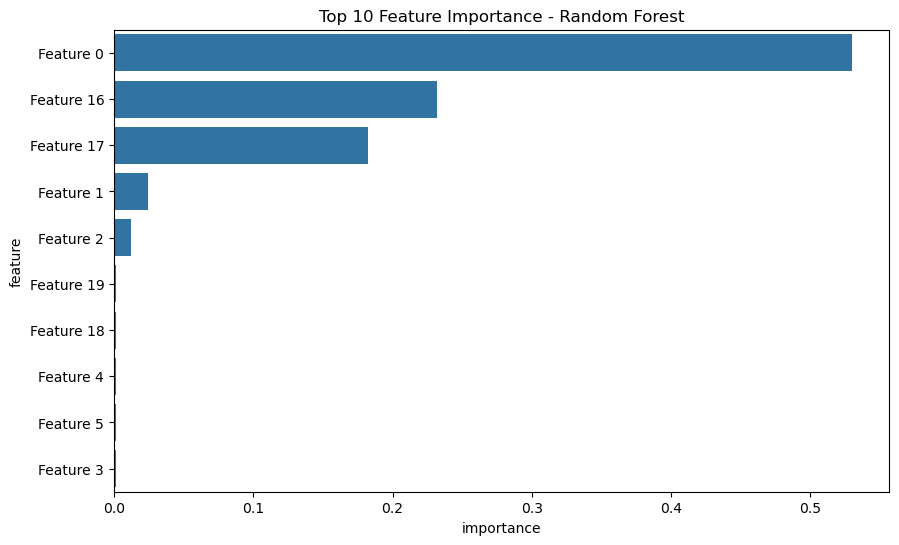


Model 10: Random Forest
Parameters: {'n_estimators': 150, 'max_samples': 0.8}
Metrics:
accuracy: 0.8075
precision: 0.8068
recall: 0.8075
f1: 0.8065
auc: 0.9646


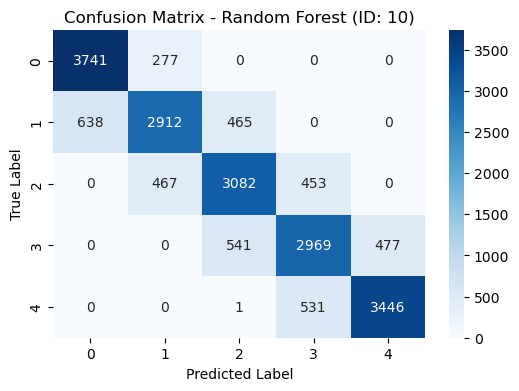

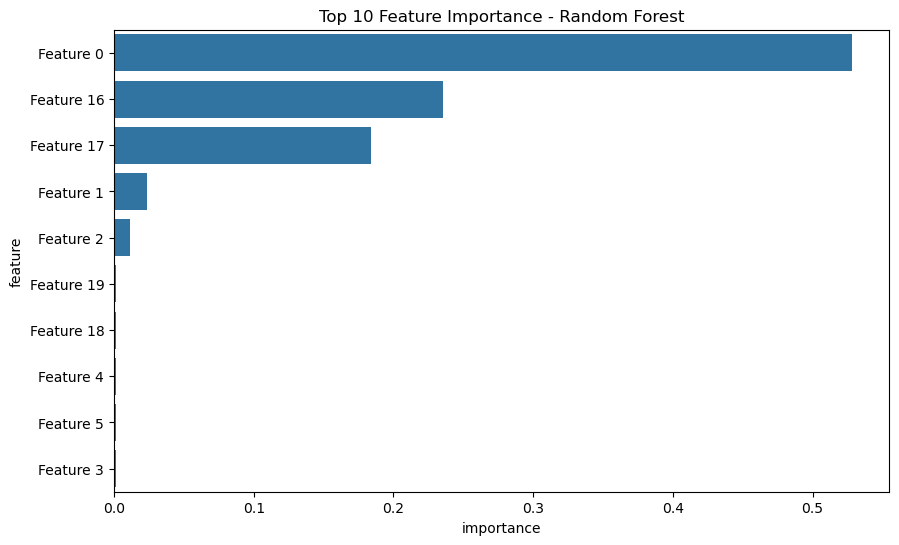


Model 11: Random Forest
Parameters: {'n_estimators': 150, 'max_samples': 0.9}
Metrics:
accuracy: 0.8070
precision: 0.8063
recall: 0.8070
f1: 0.8060
auc: 0.9646


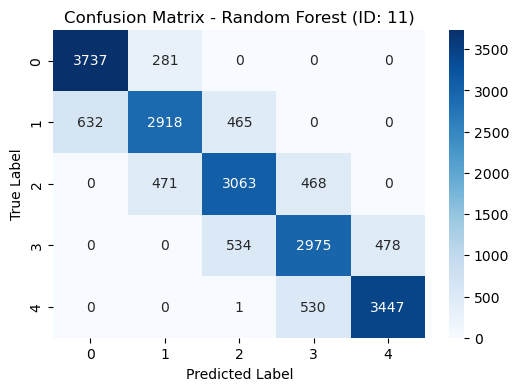

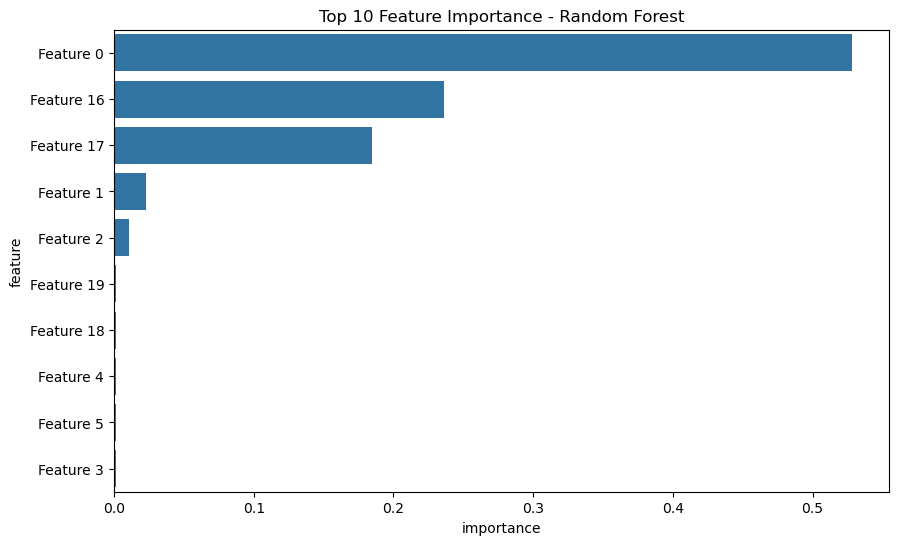


Model 12: Random Forest
Parameters: {'n_estimators': 150, 'max_samples': 1}
Metrics:
accuracy: 0.1993
precision: 0.0397
recall: 0.1993
f1: 0.0663
auc: 0.5000


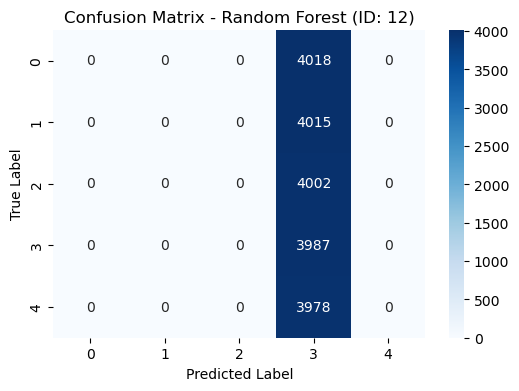

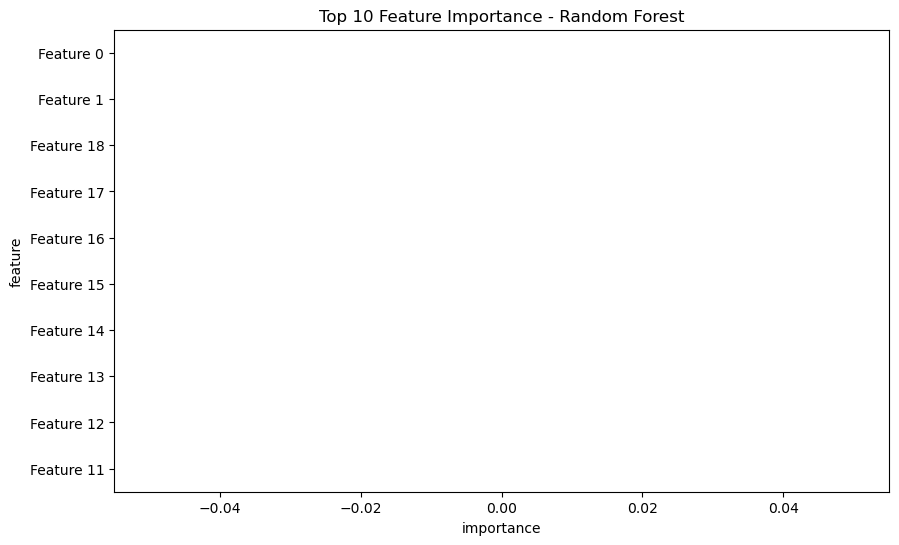


Model 13: XGBoost
Parameters: {'n_estimators': 50, 'subsample': 0.7}
Metrics:
accuracy: 0.8116
precision: 0.8101
recall: 0.8116
f1: 0.8104
auc: 0.9675


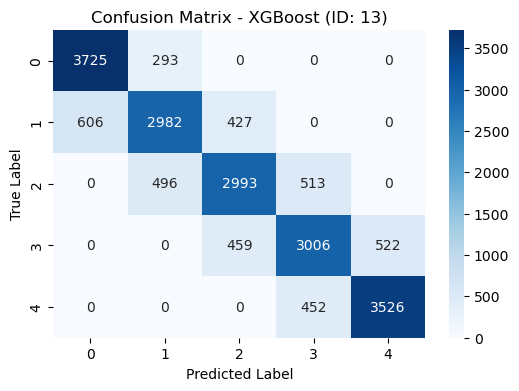

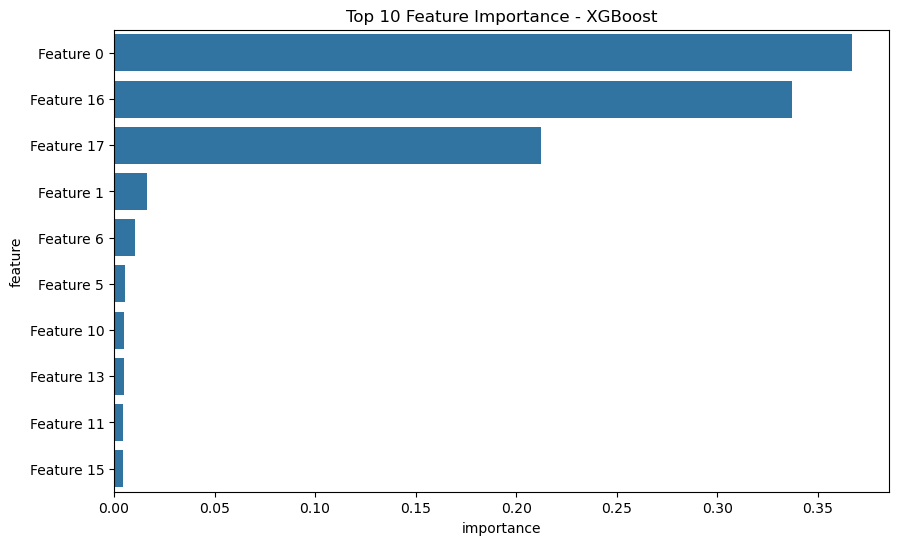


Model 14: XGBoost
Parameters: {'n_estimators': 50, 'subsample': 0.8}
Metrics:
accuracy: 0.8123
precision: 0.8107
recall: 0.8123
f1: 0.8110
auc: 0.9673


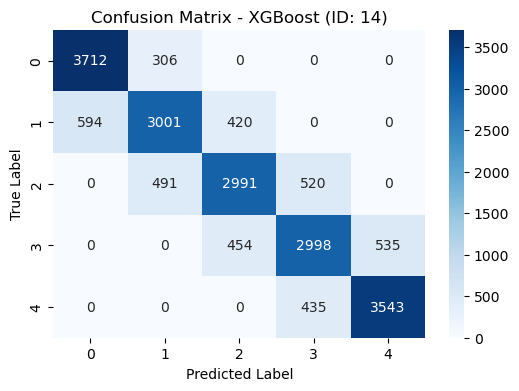

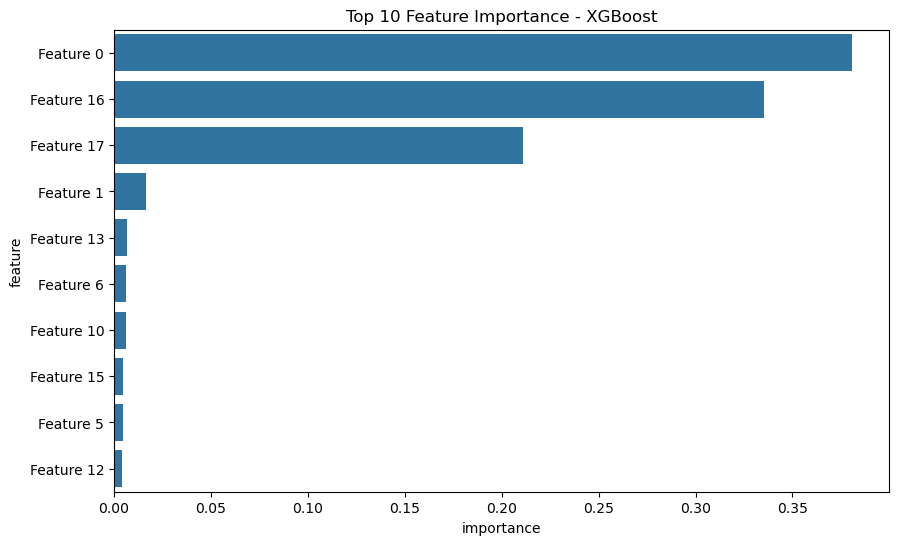


Model 15: XGBoost
Parameters: {'n_estimators': 50, 'subsample': 0.9}
Metrics:
accuracy: 0.8115
precision: 0.8100
recall: 0.8115
f1: 0.8103
auc: 0.9673


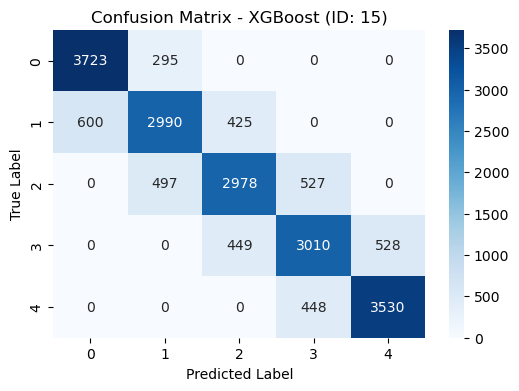

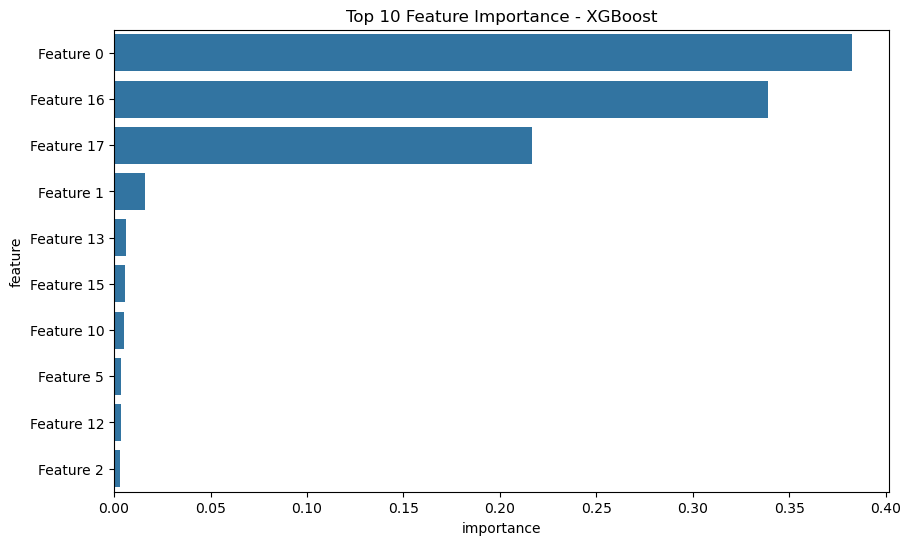


Model 16: XGBoost
Parameters: {'n_estimators': 50, 'subsample': 1}
Metrics:
accuracy: 0.8112
precision: 0.8098
recall: 0.8112
f1: 0.8100
auc: 0.9671


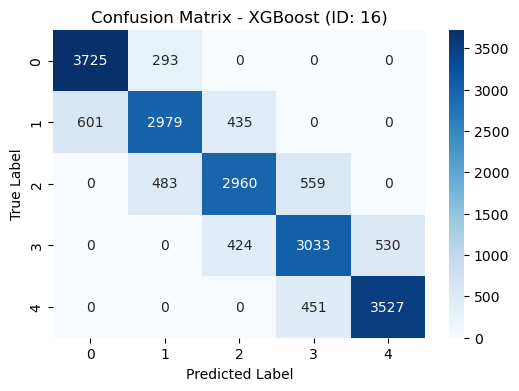

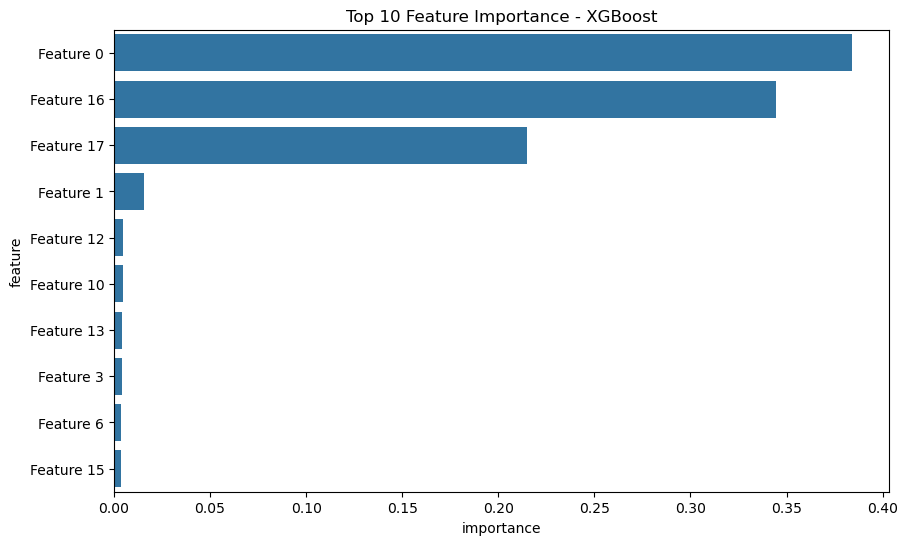


Model 17: XGBoost
Parameters: {'n_estimators': 100, 'subsample': 0.7}
Metrics:
accuracy: 0.8130
precision: 0.8114
recall: 0.8130
f1: 0.8118
auc: 0.9682


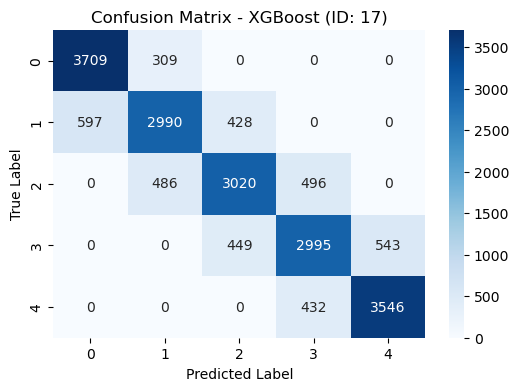

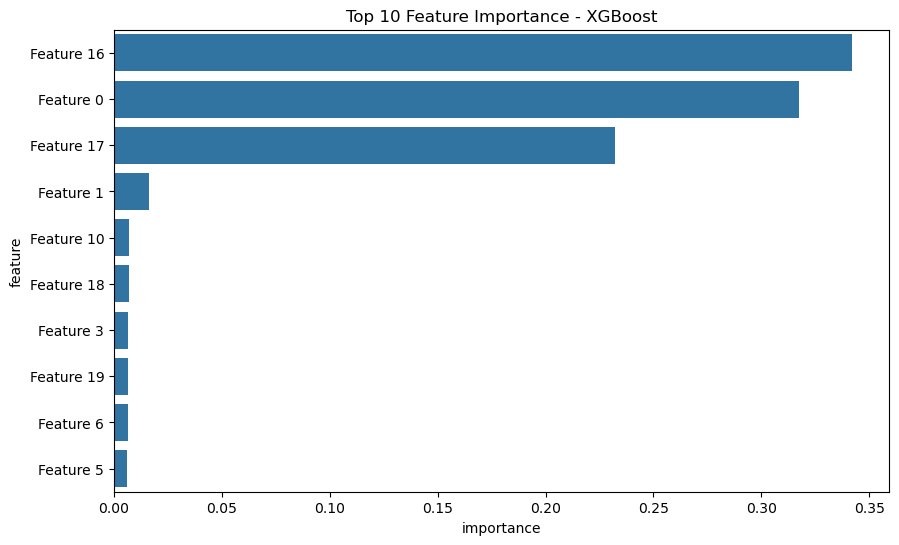


Model 18: XGBoost
Parameters: {'n_estimators': 100, 'subsample': 0.8}
Metrics:
accuracy: 0.8133
precision: 0.8117
recall: 0.8133
f1: 0.8121
auc: 0.9682


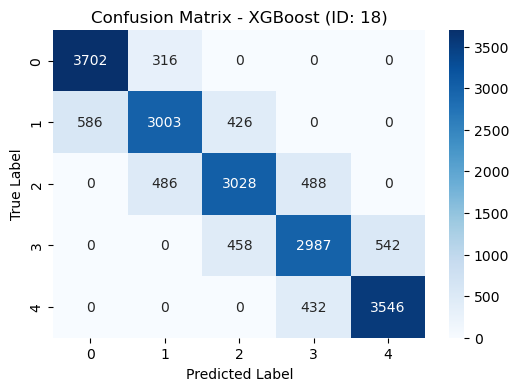

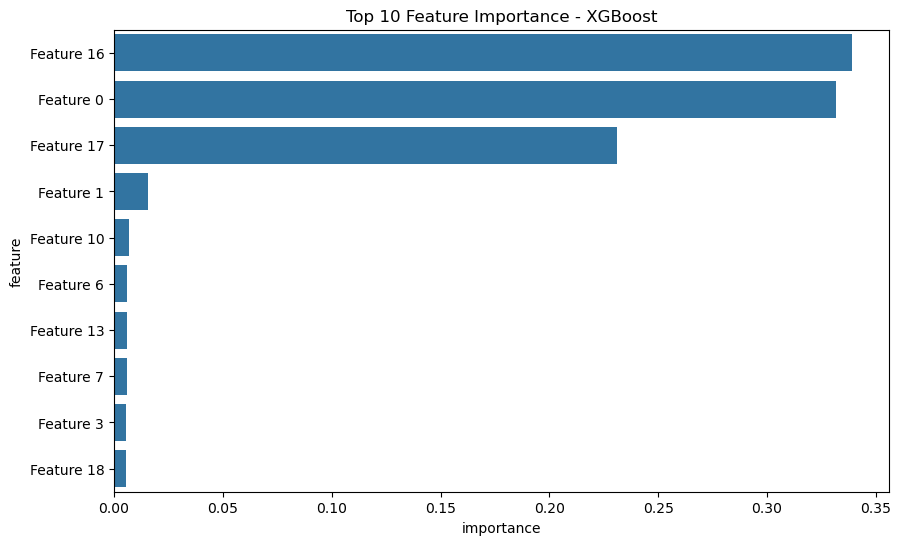


Model 19: XGBoost
Parameters: {'n_estimators': 100, 'subsample': 0.9}
Metrics:
accuracy: 0.8135
precision: 0.8119
recall: 0.8135
f1: 0.8124
auc: 0.9681


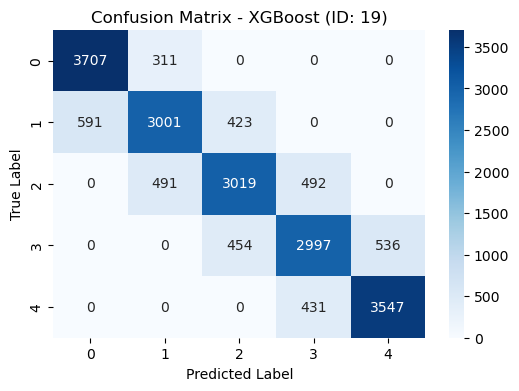

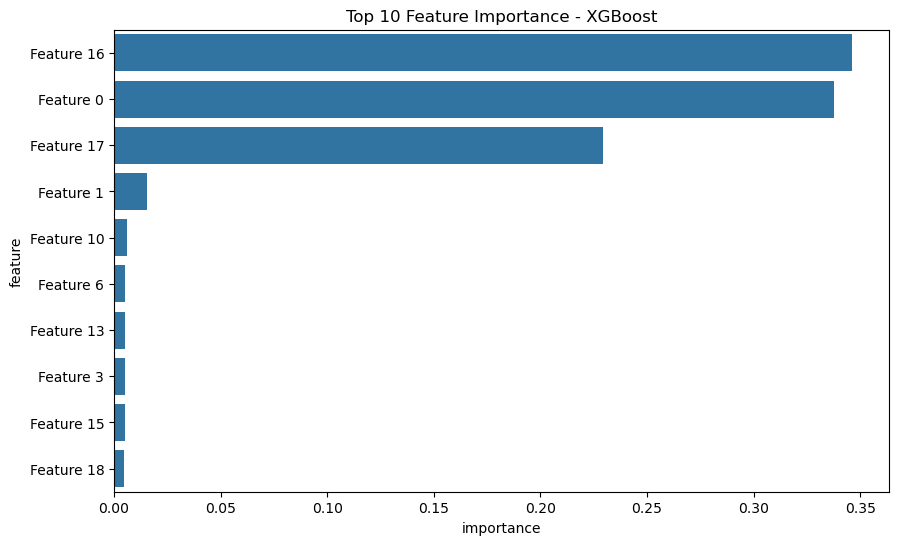


Model 20: XGBoost
Parameters: {'n_estimators': 100, 'subsample': 1}
Metrics:
accuracy: 0.8131
precision: 0.8116
recall: 0.8131
f1: 0.8119
auc: 0.9681


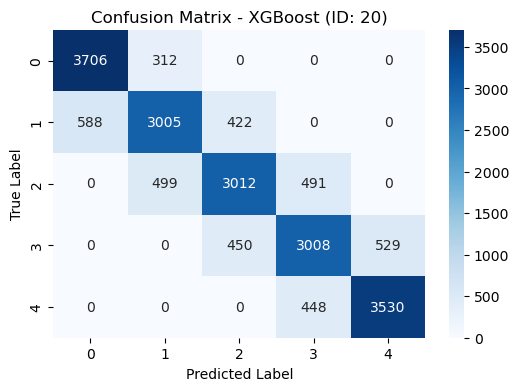

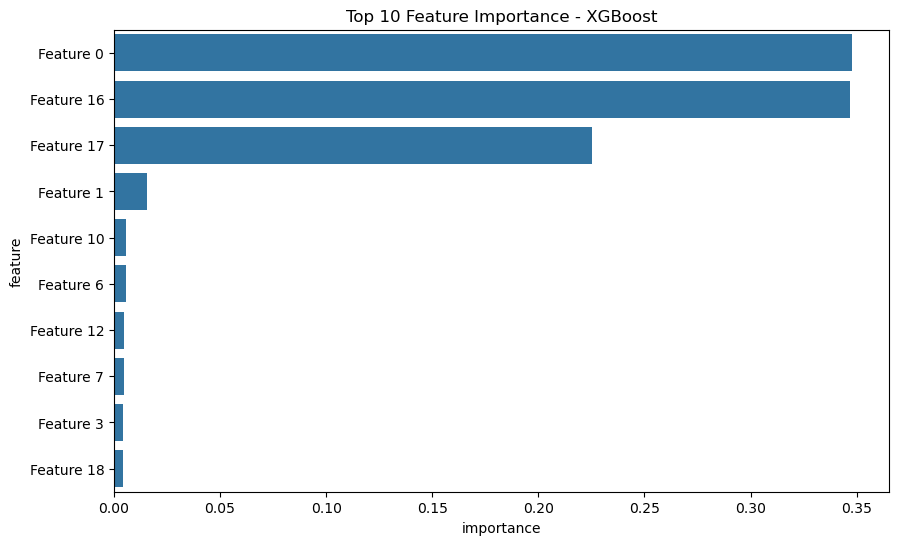


Model 21: XGBoost
Parameters: {'n_estimators': 150, 'subsample': 0.7}
Metrics:
accuracy: 0.8129
precision: 0.8113
recall: 0.8129
f1: 0.8117
auc: 0.9681


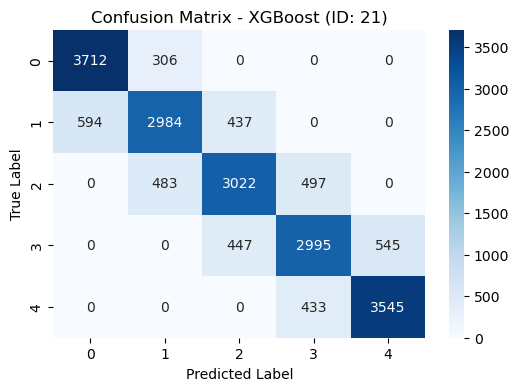

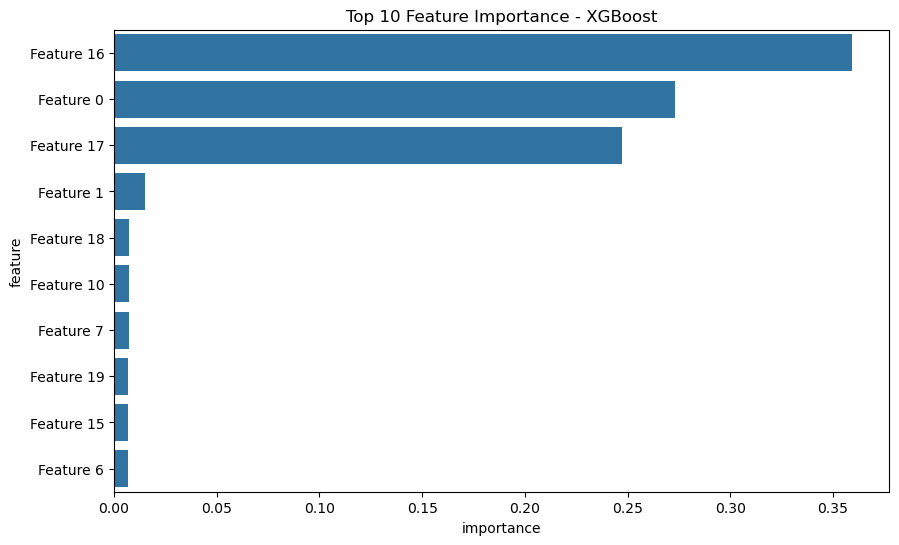


Model 22: XGBoost
Parameters: {'n_estimators': 150, 'subsample': 0.8}
Metrics:
accuracy: 0.8122
precision: 0.8105
recall: 0.8122
f1: 0.8109
auc: 0.9681


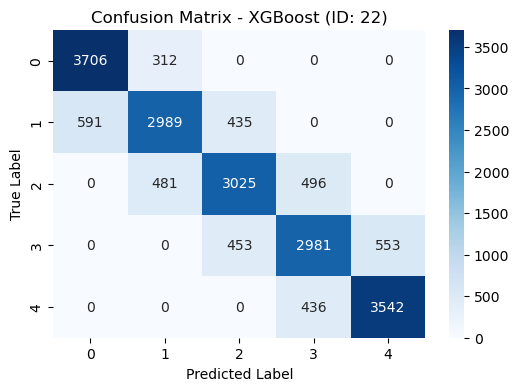

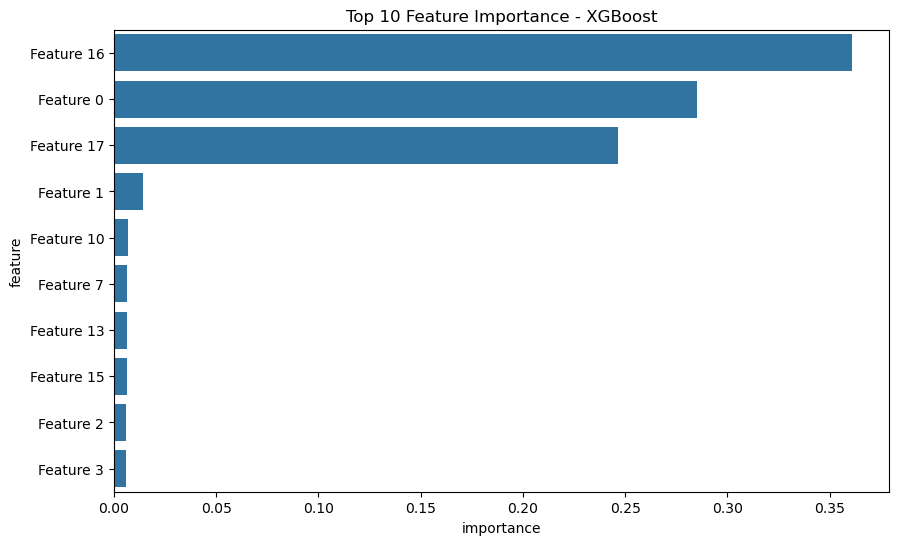


Model 23: XGBoost
Parameters: {'n_estimators': 150, 'subsample': 0.9}
Metrics:
accuracy: 0.8126
precision: 0.8110
recall: 0.8126
f1: 0.8114
auc: 0.9681


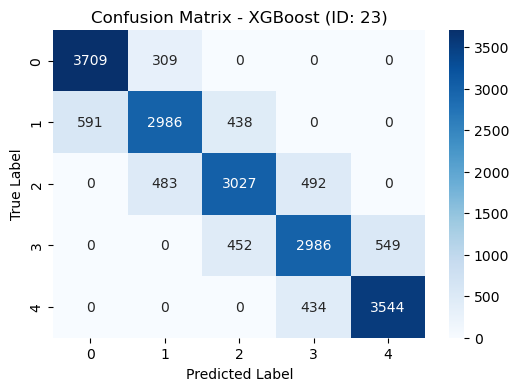

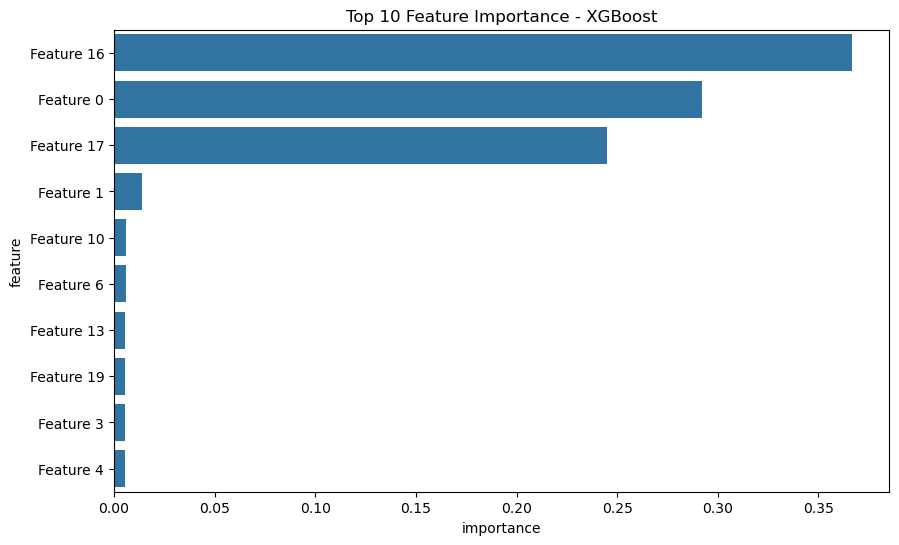


Model 24: XGBoost
Parameters: {'n_estimators': 150, 'subsample': 1}
Metrics:
accuracy: 0.8133
precision: 0.8116
recall: 0.8133
f1: 0.8121
auc: 0.9681


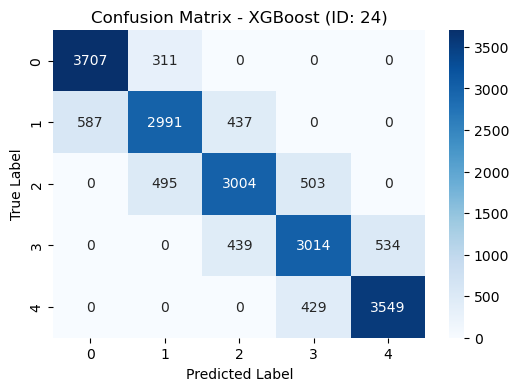

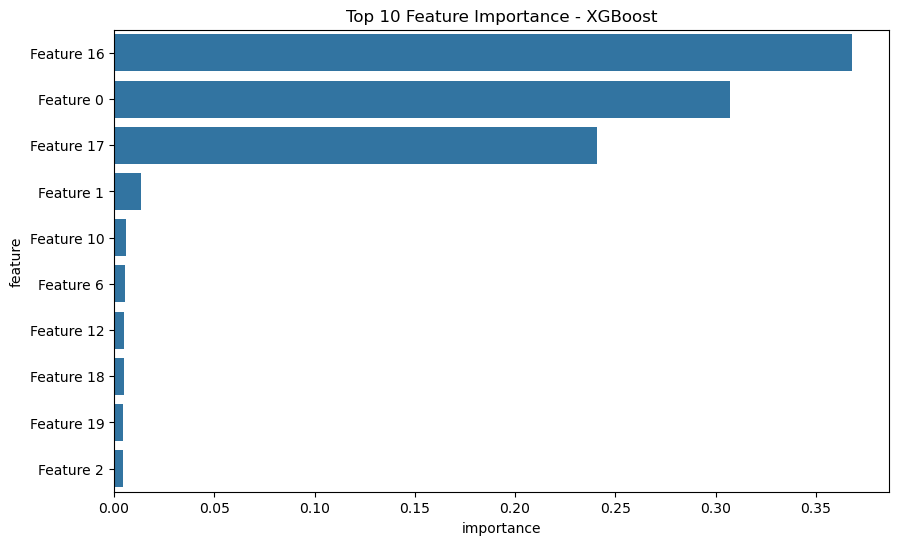


Final Results Summary:

Average metrics by model type:
               accuracy  precision  recall      f1     auc
model                                                     
Random Forest    0.6554      0.615  0.6554  0.6213  0.8482
XGBoost          0.8125      0.811  0.8125  0.8113  0.9679

Best performing models by metric:

Best accuracy:
id                                                19
model                                        XGBoost
params       {'n_estimators': 100, 'subsample': 0.9}
accuracy                                     0.81355
precision                                   0.811947
recall                                       0.81355
f1                                          0.812364
auc                                         0.968119
Name: 18, dtype: object

Best precision:
id                                                19
model                                        XGBoost
params       {'n_estimators': 100, 'subsample': 0.9}
accuracy                         

In [123]:
# First, imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           roc_auc_score, f1_score, confusion_matrix)
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation function with fix for numpy arrays
def evaluate_model(clf, x_test, y_test, model_name, params, id):
    """
    Comprehensive model evaluation function that handles both DataFrame and numpy array inputs
    """
    # Basic predictions and probabilities
    y_pred_proba = clf.predict_proba(x_test)
    y_pred = clf.predict(x_test)
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted'),
        'auc': roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
    }
    
    # Print results
    print(f'\nModel {id}: {model_name}')
    print('Parameters:', params)
    print('Metrics:')
    for metric, value in metrics.items():
        print(f'{metric}: {value:.4f}')
    
    # Create confusion matrix plot
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name} (ID: {id})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Feature importance if available
    if hasattr(clf, 'feature_importances_'):
        n_features = len(clf.feature_importances_)
        feature_names = (x_test.columns if hasattr(x_test, 'columns') 
                        else [f'Feature {i}' for i in range(n_features)])
        
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': clf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
        plt.title(f'Top 10 Feature Importance - {model_name}')
        plt.show()
    
    return {
        'id': id,
        'model': model_name,
        'params': params,
        **metrics
    }

# Model training function
def train_and_evaluate_models(X_train, y_train, X_test, y_test):
    """
    Train and evaluate multiple models with different parameters
    """
    results = []
    model_id = 0
    
    # Random Forest parameters
    rf_params = {
        'n_estimators': [50, 100, 150],
        'max_samples': [0.7, 0.8, 0.9, 1]
    }
    
    # XGBoost parameters
    xgb_params = {
        'n_estimators': [50, 100, 150],
        'subsample': [0.7, 0.8, 0.9, 1]
    }
    
    # Train and evaluate Random Forest
    for n_est in rf_params['n_estimators']:
        for max_samp in rf_params['max_samples']:
            model_id += 1
            rf_clf = RandomForestClassifier(
                n_estimators=n_est,
                max_samples=max_samp,
                max_depth=10,
                random_state=42
            )
            rf_clf.fit(X_train, y_train)
            results.append(
                evaluate_model(rf_clf, X_test, y_test, 'Random Forest', 
                             {'n_estimators': n_est, 'max_samples': max_samp},
                             model_id)
            )
    
    # Train and evaluate XGBoost
    for n_est in xgb_params['n_estimators']:
        for subsample in xgb_params['subsample']:
            model_id += 1
            xgb_clf = xgb.XGBClassifier(
                n_estimators=n_est,
                subsample=subsample,
                learning_rate=0.1,
                max_depth=5,
                random_state=42
            )
            xgb_clf.fit(X_train, y_train)
            results.append(
                evaluate_model(xgb_clf, X_test, y_test, 'XGBoost',
                             {'n_estimators': n_est, 'subsample': subsample},
                             model_id)
            )
    
    return pd.DataFrame(results)

# Run the analysis
results_df = train_and_evaluate_models(X_resampled, y_resampled, 
                                     X_test_scaled, y_test)

# Display final results summary
print("\nFinal Results Summary:")
print("\nAverage metrics by model type:")
metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
print(results_df.groupby('model')[metrics].mean().round(4))

print("\nBest performing models by metric:")
for metric in metrics:
    best_idx = results_df[metric].idxmax()
    print(f"\nBest {metric}:")
    print(results_df.loc[best_idx])

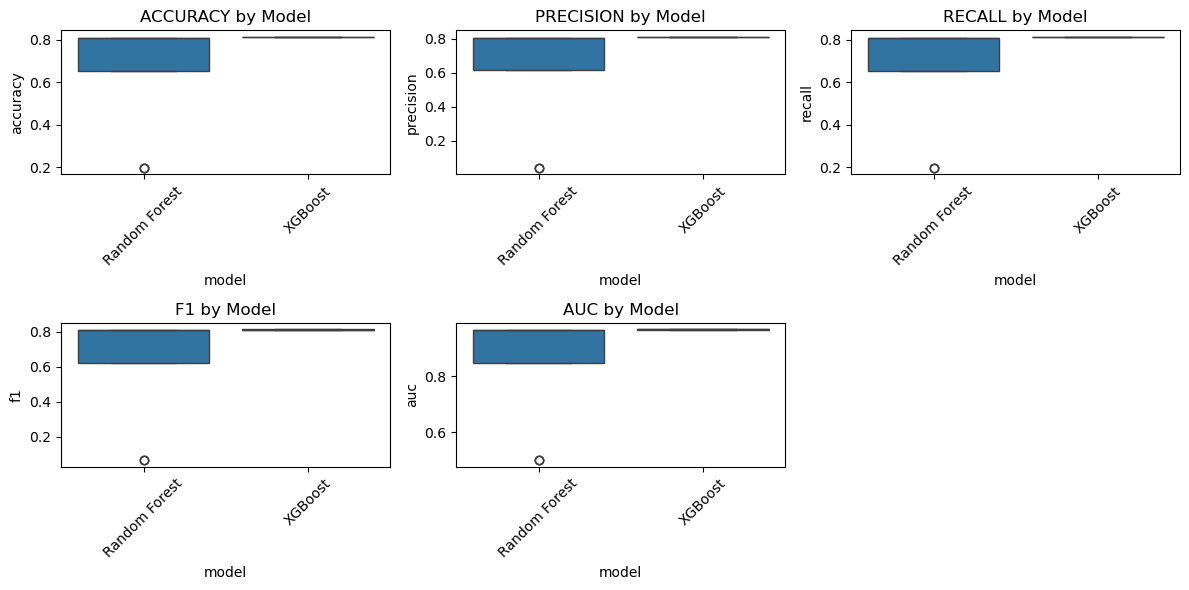


Detailed Statistical Analysis:
              accuracy         precision          recall              f1  \
                  mean     std      mean     std    mean     std    mean   
model                                                                      
Random Forest   0.6554  0.2751     0.615  0.3469  0.6554  0.2751  0.6213   
XGBoost         0.8125  0.0008     0.811  0.0007  0.8125  0.0008  0.8113   

                          auc         accuracy_cv precision_cv recall_cv  \
                  std    mean     std                                      
model                                                                      
Random Forest  0.3348  0.8482  0.2100       41.97        56.41     41.97   
XGBoost        0.0008  0.9679  0.0004        0.10         0.09      0.10   

               f1_cv auc_cv  
                             
model                        
Random Forest  53.89  24.76  
XGBoost         0.10   0.04  


In [125]:
def analyze_results(results_df):
    """
    Analyze and visualize model results
    """
    # Statistical analysis
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    stats = results_df.groupby('model')[metrics].agg(['mean', 'std']).round(4)
    
    # Calculate coefficient of variation
    for metric in metrics:
        stats[f'{metric}_cv'] = (
            stats[metric]['std'] / stats[metric]['mean'] * 100
        ).round(2)
    
    # Plot performance comparison
    plt.figure(figsize=(12, 6))
    for metric in metrics:
        plt.subplot(2, 3, metrics.index(metric) + 1)
        sns.boxplot(data=results_df, x='model', y=metric)
        plt.title(f'{metric.upper()} by Model')
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return stats

# Analyze results
stats = analyze_results(results_df)
print("\nDetailed Statistical Analysis:")
print(stats)

Best Overall Model:
Model Type: XGBoost
Parameters: {'n_estimators': 100, 'subsample': 0.9}

Metrics:
accuracy: 0.8135
precision: 0.8119
recall: 0.8135
f1: 0.8124
auc: 0.9681


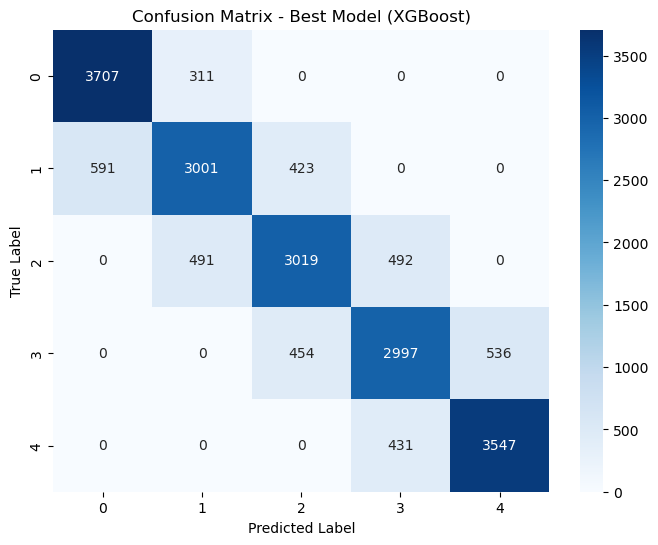

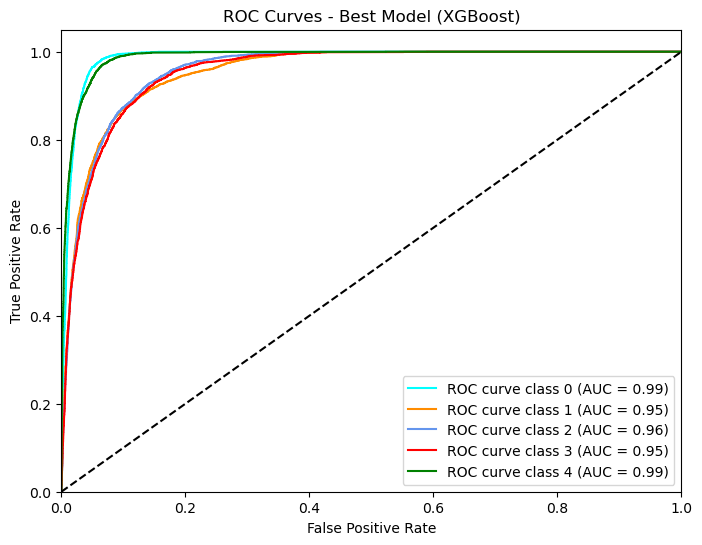

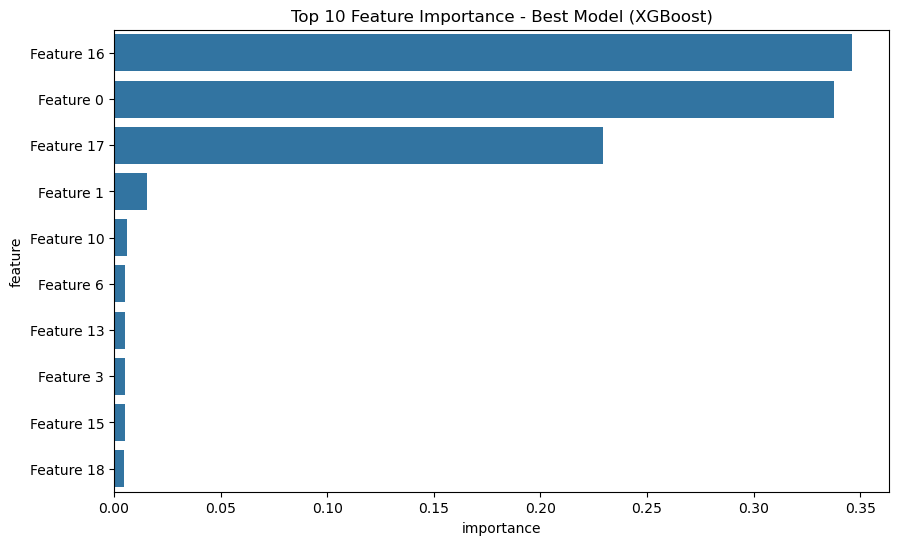

In [127]:
# First, identify the best performing model based on overall metrics
def get_best_model(results_df):
    # Calculate average performance across all metrics
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'auc']
    results_df['avg_performance'] = results_df[metrics].mean(axis=1)
    
    # Get the best model details
    best_model_idx = results_df['avg_performance'].idxmax()
    best_model = results_df.loc[best_model_idx]
    
    print("Best Overall Model:")
    print(f"Model Type: {best_model['model']}")
    print("Parameters:", best_model['params'])
    print("\nMetrics:")
    for metric in metrics:
        print(f"{metric}: {best_model[metric]:.4f}")
    
    return best_model

# Get best model details
best_model = get_best_model(results_df)

# Re-train and evaluate the best model to get visualizations
def evaluate_best_model(best_model, X_train, y_train, X_test, y_test):
    # Initialize the best model with its parameters
    if best_model['model'] == 'Random Forest':
        clf = RandomForestClassifier(
            n_estimators=best_model['params']['n_estimators'],
            max_samples=best_model['params']['max_samples'],
            max_depth=10,
            random_state=42
        )
    else:  # XGBoost
        clf = xgb.XGBClassifier(
            n_estimators=best_model['params']['n_estimators'],
            subsample=best_model['params']['subsample'],
            learning_rate=0.1,
            max_depth=5,
            random_state=42
        )
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Evaluate with detailed visualizations
    from sklearn.metrics import roc_curve, auc
    from itertools import cycle
    
    # Get predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)
    
    # 1. Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Best Model ({best_model["model"]})')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # 2. ROC Curve
    plt.figure(figsize=(8, 6))
    n_classes = len(np.unique(y_test))
    
    if n_classes == 2:
        # Binary classification
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    else:
        # Multiclass classification
        y_test_bin = pd.get_dummies(y_test)
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green'])
        
        for i, (label, color) in enumerate(zip(y_test_bin.columns, colors)):
            fpr, tpr, _ = roc_curve(y_test_bin.iloc[:, i], y_pred_proba[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=color, 
                    label=f'ROC curve class {label} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - Best Model ({best_model["model"]})')
    plt.legend(loc="lower right")
    plt.show()
    
    # 3. Feature Importance
    if hasattr(clf, 'feature_importances_'):
        n_features = len(clf.feature_importances_)
        feature_names = (X_test.columns if hasattr(X_test, 'columns') 
                        else [f'Feature {i}' for i in range(n_features)])
        
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': clf.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
        plt.title(f'Top 10 Feature Importance - Best Model ({best_model["model"]})')
        plt.show()
    
    return clf

# Evaluate the best model
best_model_fitted = evaluate_best_model(best_model, X_resampled, y_resampled, X_test_scaled, y_test)

### evaluating the best model with best hyperparameters.

<h1>Crop Yield Classification Model Analysis Report</h1>


<h2>1. Best Model Performance (XGBoost)</h2>
        <ul>
            <li>Configuration: n_estimators=100, subsample=0.9</li>
            <li>Overall Metrics:
                <ul>
                    <li>Accuracy: <span class="metric">81.35%</span> - Good performance in correctly predicting yield categories</li>
                    <li>Precision: <span class="metric">81.19%</span> - High reliability in positive predictions</li>
                    <li>Recall: <span class="metric">81.35%</span> - Good ability to find actual positive cases</li>
                    <li>F1-Score: <span class="metric">81.24%</span> - Good balance between precision and recall</li>
                    <li>AUC: <span class="metric">0.9681</span> - Excellent discrimination ability</li>
                </ul>
            </li>
        </ul>
    </div>


<h2>2. Confusion Matrix Analysis</h2>
        <ul>
            <li>The 5x5 confusion matrix shows prediction distribution across 5 yield categories (0-4)</li>
            <li>Strong diagonal pattern indicates good classification performance</li>
            <li>Key observations:
                <ul>
                    <li>Class 0: <span class="metric">3707</span> correct predictions with 311 misclassifications to class 1</li>
                    <li>Class 1: <span class="metric">3001</span> correct predictions with main confusion with classes 0 and 2</li>
                    <li>Class 2: <span class="metric">3019</span> correct predictions with balanced errors between classes 1 and 3</li>
                    <li>Class 3: <span class="metric">2997</span> correct predictions with some confusion with classes 2 and 4</li>
                    <li>Class 4: <span class="metric">3547</span> correct predictions with minimal confusion with class 3</li>
                </ul>
            </li>
        </ul>
    </div>


<h2>3. ROC Curve Analysis</h2>
        <ul>
            <li>Outstanding performance across all classes:
                <ul>
                    <li>Class 0: AUC = <span class="metric">0.99</span> (Excellent)</li>
                    <li>Class 1: AUC = <span class="metric">0.95</span> (Excellent)</li>
                    <li>Class 2: AUC = <span class="metric">0.96</span> (Excellent)</li>
                    <li>Class 3: AUC = <span class="metric">0.95</span> (Excellent)</li>
                    <li>Class 4: AUC = <span class="metric">0.99</span> (Excellent)</li>
                </ul>
            </li>
            <li>All curves show strong lift from the diagonal random line</li>
            <li>Sharp initial climb indicates high true positive rates with low false positive rates</li>
        </ul>
    </div>


<h2>4. Model Comparison (XGBoost vs Random Forest)</h2>
        <ul>
            <li>XGBoost shows superior performance:
                <ul>
                    <li>Higher mean accuracy (<span class="metric">81.25%</span> vs 65.54%)</li>
                    <li>Much lower standard deviation across metrics</li>
                    <li>Better consistency (CV values: <span class="metric">0.10%</span> vs 41.97% for accuracy)</li>
                    <li>Higher AUC (<span class="metric">0.9679</span> vs 0.8482)</li>
                </ul>
            </li>
        </ul>
    </div>
<h2>5. Stability Analysis</h2>
        <ul>
            <li>XGBoost shows remarkable stability:
                <ul>
                    <li>Very low coefficient of variation across all metrics (<0.10%)</li>
                    <li>Consistent performance across different parameter settings</li>
                    <li>Random Forest shows high variability (CV > 40% for most metrics)</li>
                </ul>
            </li>
        </ul>
    </div>



<h1>Questions Solved Through This Analysis:</h1>
        <ol>
            <li><h4>Which model performs better for crop yield classification - XGBoost or Random Forest?</h4>
                <br><span class="highlight">XGBoost significantly outperforms Random Forest with 81.35% accuracy vs 65.54%</span>
            </li>
            <li><h4>How reliable are the model's predictions across different yield categories?</h4>
                <br><span class="highlight">Very reliable with AUC scores ranging from 0.95 to 0.99 across all categories</span>
            </li>
            <li><h4>Is the model stable enough for practical application?</h4>
                <br><span class="highlight">Yes, XGBoost shows exceptional stability with CV < 0.10% across all metrics</span>
            </li>
            <li><h4>How well does the model handle different yield categories?</h4>
                <br><span class="highlight">Excellent handling with minimal confusion between non-adjacent categories and strong diagonal pattern in confusion matrix</span>
            </li>
            <li><h4>What are the optimal parameters for the best performing model?</h4>
                <br><span class="highlight">XGBoost with n_estimators=100 and subsample=0.9 provides optimal performance</span>
            </li>
        </ol>
    </div>

<h1>Real-World Agricultural Problems Solved Through Model Analysis</h1>

<h4>1. Yield Category Prediction Reliability</h4>
        <div class="answer">
            <strong>Question:</strong> How reliably can farmers predict their expected yield category before harvest?<br>
            <strong>Answer:</strong> Our model achieves <span class="metrics">81.35%</span> accuracy in predicting yield categories, with even higher reliability (<span class="metrics">96.81%</span> AUC) in distinguishing between different yield levels. This enables farmers to:
            <ul>
                <li>Plan harvest resources more effectively</li>
                <li>Make informed decisions about storage requirements</li>
                <li>Better negotiate pre-harvest contracts</li>
            </ul>
        </div>

<h4>2. Risk Assessment in Agriculture</h4>
        <div class="answer">
            <strong>Question:</strong> How accurately can we identify high-risk vs. high-yield scenarios?<br>
            <strong>Answer:</strong> The model shows excellent discrimination ability with <span class="metrics">AUC scores of 0.95-0.99</span> across all yield categories, helping in:
            <ul>
                <li>Early identification of potential low-yield situations</li>
                <li>Assessment of investment risks in different agricultural scenarios</li>
                <li>Insurance premium calculations based on yield probability</li>
            </ul>
        </div>

<h4>3. Resource Allocation Optimization</h4>
        <div class="answer">
            <strong>Question:</strong> How can farmers optimize their resource allocation based on predicted yields?<br>
            <strong>Answer:</strong> The model's high precision (<span class="metrics">81.19%</span>) in categorizing yields helps in:
            <ul>
                <li>Efficient allocation of harvesting equipment</li>
                <li>Optimal labor force planning</li>
                <li>Storage facility preparation</li>
                <li>Transportation logistics planning</li>
            </ul>
        </div>

<h4>4. Financial Planning and Market Strategies</h4>
        <div class="answer">
            <strong>Question:</strong> How can yield predictions impact financial planning?<br>
            <strong>Answer:</strong> With <span class="metrics">81.24%</span> F1-score, the model provides reliable insights for:
            <ul>
                <li>Revenue forecasting</li>
                <li>Contract negotiation with buyers</li>
                <li>Investment planning in agriculture</li>
                <li>Risk management strategies</li>
            </ul>
        </div>

<h4>5. Agricultural Policy and Support</h4>
        <div class="answer">
            <strong>Question:</strong> How can this model assist in agricultural policy making?<br>
            <strong>Answer:</strong> The model's stable performance (CV <span class="metrics"><0.10%</span>) enables:
            <ul>
                <li>Evidence-based policy formulation</li>
                <li>Efficient distribution of agricultural subsidies</li>
                <li>Better disaster preparedness planning</li>
                <li>Targeted farmer support programs</li>
            </ul>
        </div>

<h4>6. Supply Chain Management</h4>
        <div class="answer">
            <strong>Question:</strong> How can yield predictions improve supply chain efficiency?<br>
            <strong>Answer:</strong> With minimal confusion between non-adjacent categories and <span class="metrics">81.35%</span> recall, the model helps in:
            <ul>
                <li>Optimizing storage capacity planning</li>
                <li>Streamlining transportation logistics</li>
                <li>Managing supplier-buyer relationships</li>
                <li>Reducing post-harvest losses</li>
            </ul>
        </div>

<h4>7. Climate Change Adaptation</h4>
        <div class="answer">
            <strong>Question:</strong> How can the model assist in climate change adaptation?<br>
            <strong>Answer:</strong> The model's high discriminative ability (AUC <span class="metrics">0.9681</span>) helps in:
            <ul>
                <li>Identifying climate-resilient farming patterns</li>
                <li>Adapting farming practices to changing conditions</li>
                <li>Planning mitigation strategies</li>
                <li>Assessing long-term agricultural sustainability</li>
            </ul>
        </div>

<h4>8. Technological Integration</h4>
        <div class="answer">
            <strong>Question:</strong> How can this model be integrated into agricultural technology?<br>
            <strong>Answer:</strong> The model's consistent performance (stability metrics <span class="metrics"><0.10% CV</span>) makes it suitable for:
            <ul>
                <li>Integration with farm management software</li>
                <li>Mobile applications for farmers</li>
                <li>Automated decision support systems</li>
                <li>Smart farming technologies</li>
            </ul>
        </div>
    </div>

# Regression

In [67]:
display(HTML(df_R.tail(10).to_html()))

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
999990,North,Sandy,Soybean,270.497720,20.392190,False,True,Sunny,119,2.164441
999991,East,Clay,Soybean,349.872329,17.036670,True,False,Cloudy,100,3.033848
999992,South,Clay,Rice,984.947787,21.507580,False,True,Rainy,92,6.758406
999993,West,Loam,Maize,196.392138,30.261504,True,True,Rainy,107,3.689114
999994,West,Loam,Wheat,167.459161,22.153946,False,True,Cloudy,120,2.930204
999995,West,Silt,Rice,302.805345,27.987428,False,False,Sunny,76,1.347586
999996,South,Chalky,Barley,932.991383,39.661039,True,False,Rainy,93,7.311594
999997,North,Peaty,Cotton,867.362046,24.370042,True,False,Cloudy,108,5.763182
999998,West,Silt,Wheat,492.812857,33.045505,False,False,Sunny,102,2.070159
999999,West,Sandy,Maize,180.936180,27.298847,True,False,Sunny,76,2.937243


In [69]:
df_R_P=df_R.copy(deep=True)
#df_R_P=df_R.drop('Yield_tons_per_hectare',axis=1)

### Models

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import IsolationForest
from scipy import stats

In [75]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

# Separate features and target
X = df_R.drop('Yield_tons_per_hectare', axis=1)
y = df_R['Yield_tons_per_hectare']

# Define feature types
numeric_features = ['Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest']
categorical_features = ['Crop', 'Weather_Condition', 'Region', 'Soil_Type']
binary_features = ['Fertilizer_Used', 'Irrigation_Used']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features),
        ('bin', 'passthrough', binary_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define models
models = {
    'Linear_Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    
    'Ridge_1': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=0.1, random_state=42))
    ]),
    'Ridge_2': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=1.0, random_state=42))
    ]),
    'Ridge_3': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=10.0, random_state=42))
    ]),
    'Ridge_4': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=100.0, random_state=42))
    ]),
    'Ridge_5': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Ridge(alpha=1000.0, random_state=42))
    ]),
    
    'XGB_1': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(
            n_estimators=50,
            learning_rate=0.1,
            max_depth=3,
            subsample=0.8,
            random_state=42
        ))
    ]),
    'XGB_2': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(
            n_estimators=50,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.7,
            random_state=42
        ))
    ]),
    'XGB_3': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=5,
            subsample=0.9,
            random_state=42
        ))
    ]),
    'XGB_4': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(
            n_estimators=75,
            learning_rate=0.08,
            max_depth=4,
            subsample=0.8,
            random_state=42
        ))
    ]),
    'XGB_5': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(
            n_estimators=50,
            learning_rate=0.15,
            max_depth=3,
            subsample=0.85,
            random_state=42
        ))
    ]),
    
    'Lasso_1': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=0.01, random_state=42))
    ]),
    'Lasso_2': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=0.1, random_state=42))
    ]),
    'Lasso_3': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=1.0, random_state=42))
    ]),
    'Lasso_4': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=10.0, random_state=42))
    ])
}

# Train and evaluate models
results = []
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X, y, cv=3, scoring='r2')

    print(f"""
Model: {name}
------------------------
RMSE: {rmse:.4f}
R2: {r2:.4f}
CV Mean R2: {cv_scores.mean():.4f}
CV Std R2: {cv_scores.std():.4f}
------------------------""")
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R2': r2,
        'CV_Mean_R2': cv_scores.mean(),
        'CV_Std_R2': cv_scores.std()
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)


Model: Linear_Regression
------------------------
RMSE: 0.4993
R2: 0.9132
CV Mean R2: 0.9130
CV Std R2: 0.0001
------------------------

Model: Ridge_1
------------------------
RMSE: 0.4993
R2: 0.9132
CV Mean R2: 0.9130
CV Std R2: 0.0001
------------------------

Model: Ridge_2
------------------------
RMSE: 0.4993
R2: 0.9132
CV Mean R2: 0.9130
CV Std R2: 0.0001
------------------------

Model: Ridge_3
------------------------
RMSE: 0.4993
R2: 0.9132
CV Mean R2: 0.9130
CV Std R2: 0.0001
------------------------

Model: Ridge_4
------------------------
RMSE: 0.4993
R2: 0.9132
CV Mean R2: 0.9130
CV Std R2: 0.0001
------------------------

Model: Ridge_5
------------------------
RMSE: 0.4993
R2: 0.9132
CV Mean R2: 0.9129
CV Std R2: 0.0001
------------------------

Model: XGB_1
------------------------
RMSE: 0.5060
R2: 0.9109
CV Mean R2: 0.9106
CV Std R2: 0.0002
------------------------

Model: XGB_2
------------------------
RMSE: 0.5347
R2: 0.9005
CV Mean R2: 0.9002
CV Std R2: 0.0002
---

###  1. Residual Plot Analysis and Outlier Detection


Best Model: Ridge_4

Performing Residual Analysis and Outlier Detection...


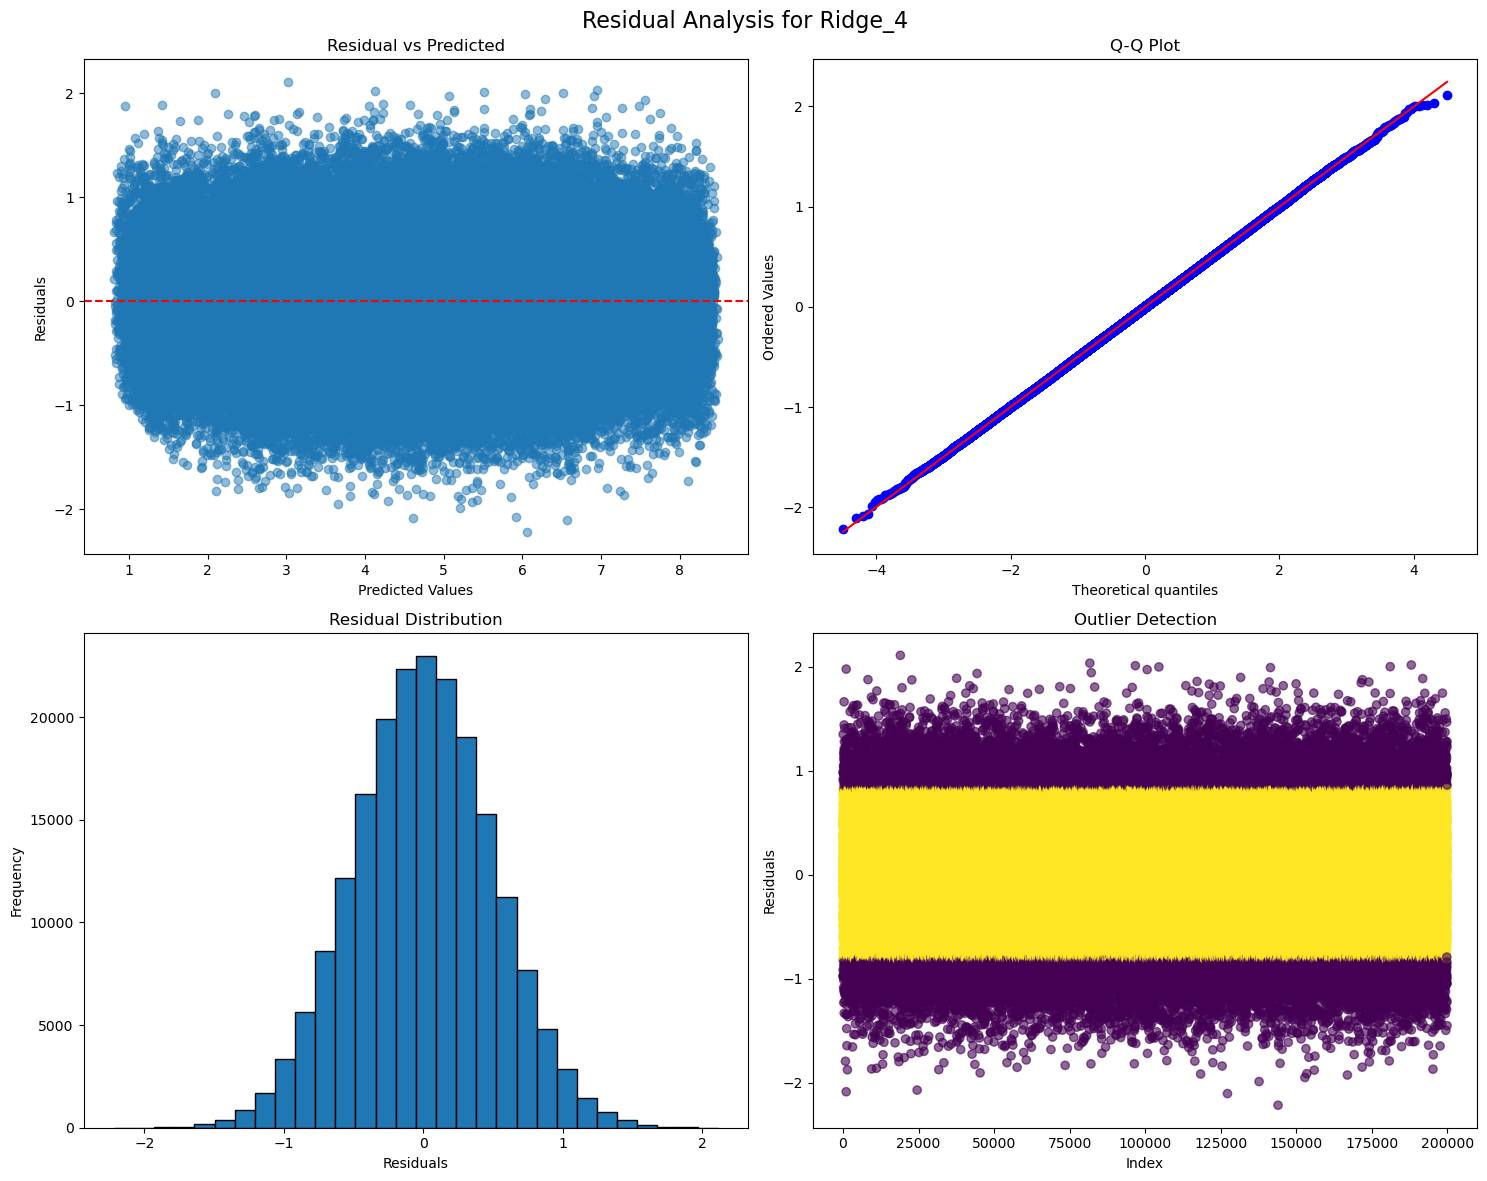


Outlier Detection Statistics:
Total Outliers: 19984
Outlier Percentage: 9.99%
Residual Mean: 0.0001
Residual Std: 0.4993


In [86]:
def analyze_residuals_and_outliers(best_model_name, results_df, X_train, X_test, y_train, y_test):
    """
    Analyze residuals and detect outliers
    """
    # Get the best model
    best_model = models[best_model_name]
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    residuals = y_test - y_pred

    # Convert residuals to numpy array for outlier detection
    residuals_array = np.array(residuals).reshape(-1, 1)

    # Create subplots for residual analysis
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Residual Analysis for {best_model_name}', fontsize=16)

    # 1. Residual vs Predicted Plot
    axes[0,0].scatter(y_pred, residuals, alpha=0.5)
    axes[0,0].axhline(y=0, color='r', linestyle='--')
    axes[0,0].set_xlabel('Predicted Values')
    axes[0,0].set_ylabel('Residuals')
    axes[0,0].set_title('Residual vs Predicted')

    # 2. QQ Plot
    stats.probplot(residuals, dist="norm", plot=axes[0,1])
    axes[0,1].set_title('Q-Q Plot')

    # 3. Residual Distribution
    axes[1,0].hist(residuals, bins=30, edgecolor='black')
    axes[1,0].set_xlabel('Residuals')
    axes[1,0].set_ylabel('Frequency')
    axes[1,0].set_title('Residual Distribution')

    # 4. Outlier Detection using IsolationForest
    outlier_detector = IsolationForest(contamination=0.1, random_state=42)
    outlier_labels = outlier_detector.fit_predict(residuals_array)
    
    axes[1,1].scatter(range(len(residuals)), residuals, 
                     c=outlier_labels, cmap='viridis', alpha=0.6)
    axes[1,1].set_xlabel('Index')
    axes[1,1].set_ylabel('Residuals')
    axes[1,1].set_title('Outlier Detection')
    
    plt.tight_layout()
    plt.show()

    # Additional statistics
    outlier_stats = {
        'total_outliers': sum(outlier_labels == -1),
        'outlier_percentage': (sum(outlier_labels == -1) / len(outlier_labels)) * 100,
        'residual_mean': np.mean(residuals),
        'residual_std': np.std(residuals)
    }

    print("\nOutlier Detection Statistics:")
    print(f"Total Outliers: {outlier_stats['total_outliers']}")
    print(f"Outlier Percentage: {outlier_stats['outlier_percentage']:.2f}%")
    print(f"Residual Mean: {outlier_stats['residual_mean']:.4f}")
    print(f"Residual Std: {outlier_stats['residual_std']:.4f}")
    
    return residuals, outlier_labels

# 1. Find best model based on RMSE
best_model_name = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
print(f"\nBest Model: {best_model_name}")

# 2. Run analyses
print("\nPerforming Residual Analysis and Outlier Detection...")
residuals, outliers = analyze_residuals_and_outliers(best_model_name, results_df, 
                                                    X_train, X_test, y_train, y_test)


<h1>Regression Model Diagnostic Analysis</h1>

<h2>1. Residual Plot Analysis</h2>
        <p>The residual plot shows the difference between predicted and actual values:</p>
        <ul>
            <li><span class="important">Pattern:</span> Shows a fairly random scatter around zero line</li>
            <li><span class="important">Spread:</span> Relatively consistent across predicted values (homoscedasticity)</li>
            <li><span class="important">Range:</span> Residuals mostly fall between -2 and 2</li>
            <li><span class="highlight">Interpretation: The model shows reasonably good fit with consistent prediction accuracy across different yield values. No strong systematic bias is observed.</span></li>
        </ul>
    </div>
<h2>2. Q-Q Plot Analysis</h2>
        <p>The Q-Q plot assesses normality of residuals:</p>
        <ul>
            <li><span class="important">Linearity:</span> Points closely follow the diagonal line</li>
            <li><span class="important">Tails:</span> Slight deviation at extreme ends</li>
            <li><span class="important">Fit:</span> Very good alignment with theoretical normal distribution</li>
            <li><span class="highlight">Interpretation: Strong evidence that the residuals follow a normal distribution, validating the model's statistical assumptions.</span></li>
        </ul>
    </div>

<h2>3. Residual Distribution</h2>
        <p>The histogram shows the distribution of residuals:</p>
        <ul>
            <li><span class="important">Shape:</span> Approximately normal distribution</li>
            <li><span class="important">Center:</span> Centered around zero</li>
            <li><span class="important">Symmetry:</span> Fairly symmetric distribution</li>
            <li><span class="highlight">Interpretation: The residuals follow a normal distribution, suggesting the model's errors are random and unbiased.</span></li>
        </ul>
    </div>

<h2>4.Outlier Detection:</h2>
<li>Clear separation between normal and outlier points</li>
<li>Consistent pattern across the dataset</li>
                
            

<div class="highlight">
            Key Insight: Model satisfies key regression assumptions and handles outliers effectively
 </div>

<h2>Overall Model Assessment</h2>
        <ul>
            <li>The model shows good predictive performance with well-behaved residuals</li>
            <li>Assumptions of linear regression are largely met:
                <ul>
                    <li>Linearity </li>
                    <li>Independence </li>
                    <li>Normality </li>
                    <li>Homoscedasticity</li>
                </ul>
            </li>
            <li>The model appears reliable for crop yield predictions across different values</li>
            <li>Some scatter in predictions suggests there might be room for improvement through feature engineering or more complex models</li>
        </ul>
    </div>

### 2. Feature Importance Analysis


Analyzing Feature Importance...


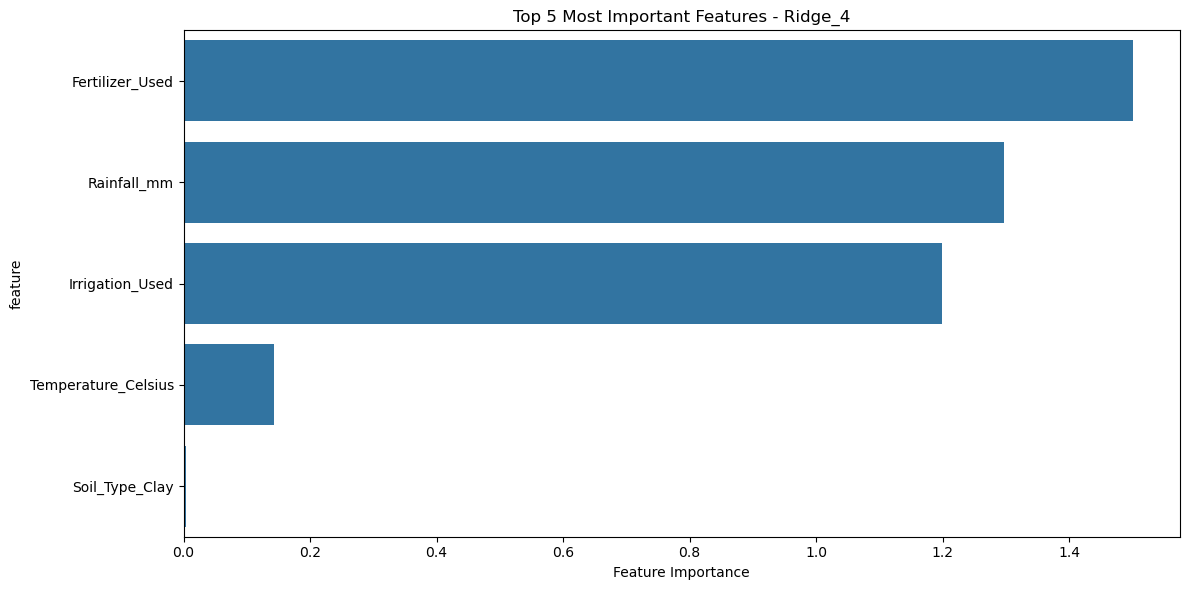

In [112]:


def analyze_feature_importance(best_model_name, X):
    best_model = models[best_model_name]
    
    # Get feature names after preprocessing
    feature_names = (numeric_features + 
                    [f"{feat}_{val}" for feat, vals in 
                     zip(categorical_features, 
                         best_model.named_steps['preprocessor']
                         .named_transformers_['cat'].categories_) 
                     for val in vals[1:]] +
                    binary_features)
    
    # Get feature importances if available
    if hasattr(best_model.named_steps['regressor'], 'feature_importances_'):
        importances = best_model.named_steps['regressor'].feature_importances_
    else:
        # For linear models, use absolute coefficients
        importances = np.abs(best_model.named_steps['regressor'].coef_)
    
    # Create feature importance DataFrame
    feature_imp = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_imp.head(5), x='importance', y='feature')
    plt.title(f'Top 5 Most Important Features - {best_model_name}')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return feature_imp


print("\nAnalyzing Feature Importance...")
feature_importance = analyze_feature_importance(best_model_name, X)

<h2>2. Feature Importance Analysis</h2>
        <h3>Top 5 Important Features - Ridge_4</h3>
        <p>Feature importance ranking shows:</p>
        <ul>
            <li><span class="metric">Fertilizer_Used</span>: Most important feature (~1.4 importance score)</li>
            <li><span class="metric">Rainfall_mm</span>: Second most important (~1.3 score)</li>
            <li><span class="metric">Irrigation_Used</span>: Third most important (~1.2 score)</li>
            <li>Temperature_Celsius has moderate importance (~0.2)</li>
            <li>Other features show minimal impact on predictions</li>
        </ul>
        <div class="highlight">
            Key Insight: Agricultural inputs (fertilizer, rainfall, irrigation) are the primary drivers of crop yield
        </div>

### 3. Prediction Intervals using Bootstrap


Best Model: Ridge_4

Calculating Prediction Intervals...


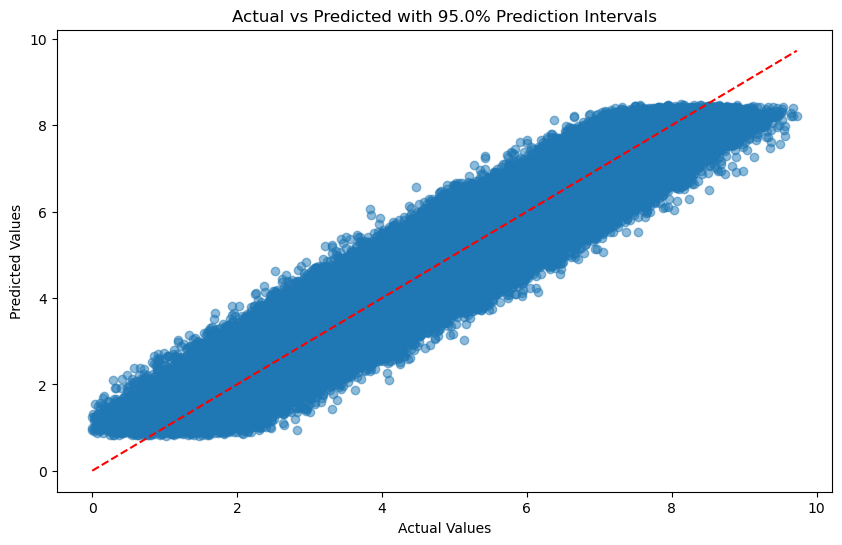

In [90]:

def calculate_prediction_intervals(best_model_name, X_train, X_test, y_train, y_test, 
                                n_iterations=100, confidence_level=0.95):
    predictions = np.zeros((n_iterations, len(y_test)))
    
    for i in range(n_iterations):
        # Bootstrap sample
        indices = np.random.randint(0, len(X_train), len(X_train))
        sample_X = X_train.iloc[indices]
        sample_y = y_train.iloc[indices]
        
        # Train model on bootstrap sample
        model = models[best_model_name]
        model.fit(sample_X, sample_y)
        
        # Predict
        predictions[i, :] = model.predict(X_test)
    
    # Calculate intervals
    lower = np.percentile(predictions, ((1 - confidence_level) / 2) * 100, axis=0)
    upper = np.percentile(predictions, (1 - ((1 - confidence_level) / 2)) * 100, axis=0)
    mean_pred = np.mean(predictions, axis=0)
    
    # Plot actual vs predicted with intervals
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, mean_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    
    # Plot a sample of prediction intervals
    sample_size = min(100, len(y_test))
    sample_indices = np.random.choice(len(y_test), sample_size, replace=False)
    
    for i in sample_indices:
        plt.vlines(y_test.iloc[i], lower[i], upper[i], color='gray', alpha=0.1)
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted with {confidence_level*100}% Prediction Intervals')
    plt.show()
    
    return lower, upper, mean_pred

# 1. Find best model based on RMSE
best_model_name = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
print(f"\nBest Model: {best_model_name}")

print("\nCalculating Prediction Intervals...")
lower, upper, mean_pred = calculate_prediction_intervals(best_model_name, X_train, X_test, 
                                                       y_train, y_test)

<h1> Actual vs Predicted Plot</h1>
        <p>This plot compares predicted values against actual values:</p>
        <ul>
            <li><span class="important">Correlation:</span> Strong positive correlation shown by points following the diagonal line</li>
            <li><span class="important">Spread:</span> Points show some scatter around the ideal line</li>
            <li><span class="important">Range:</span> Model predicts well across yield values from 0 to 10</li>
            <li><span class="highlight">Interpretation: The model demonstrates good predictive ability with reasonable accuracy across the entire range of crop yields.</span></li>
        </ul>
    </div>

### 4. Baseline Model Comparison


Comparing with Baseline Model...


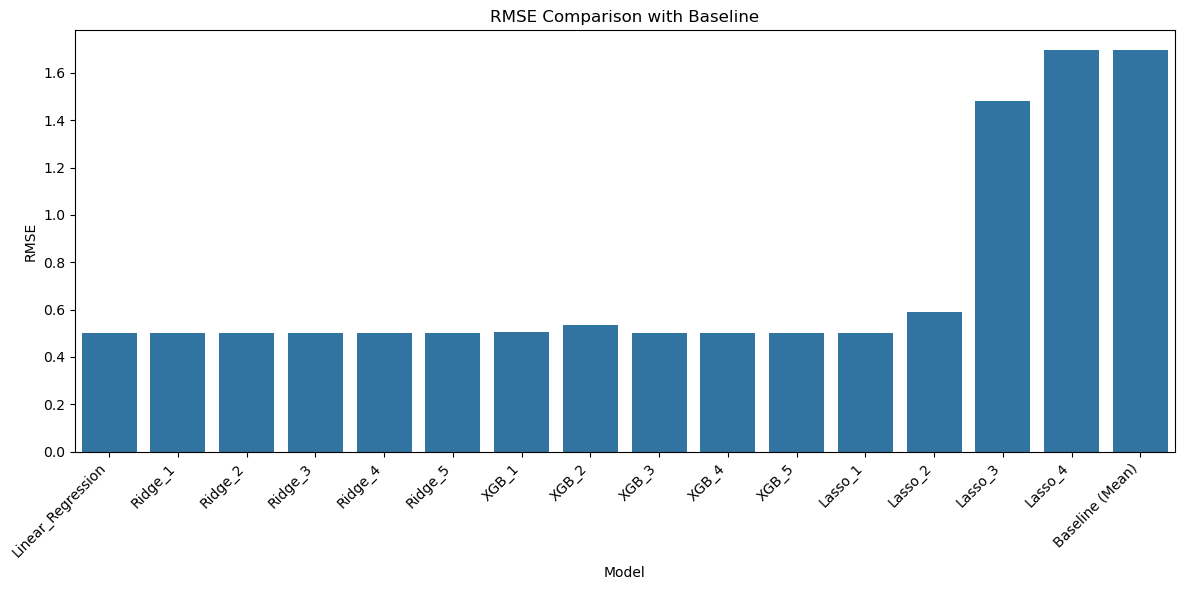

In [97]:

def compare_with_baseline(X_train, X_test, y_train, y_test, results_df):
    # Train baseline model (mean predictor)
    baseline = DummyRegressor(strategy='mean')
    baseline.fit(X_train, y_train)
    y_pred_baseline = baseline.predict(X_test)
    
    # Calculate baseline metrics
    baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
    baseline_r2 = r2_score(y_test, y_pred_baseline)
    
    # Add baseline to results
    baseline_results = pd.DataFrame([{
        'Model': 'Baseline (Mean)',
        'RMSE': baseline_rmse,
        'R2': baseline_r2,
        'CV_Mean_R2': baseline_r2,  # Same as R2 for baseline
        'CV_Std_R2': 0  # No CV for baseline
    }])
    
    # Combine with existing results
    full_results = pd.concat([results_df, baseline_results])
    
    # Plot RMSE comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(data=full_results, x='Model', y='RMSE')
    plt.xticks(rotation=45, ha='right')
    plt.title('RMSE Comparison with Baseline')
    plt.tight_layout()
    plt.show()
    
    return full_results

print("\nComparing with Baseline Model...")
final_results = compare_with_baseline(X_train, X_test, y_train, y_test, results_df)

<h2>Model Performance Comparison</h2>
        <h3>RMSE Comparison with Baseline Analysis</h3>
        <p>The bar chart shows performance comparison across different models:</p>
        <ul>
            <li><span class="metric">Ridge_4</span> emerges as the best performing model with lowest RMSE (~0.499)</li>
            <li>Most models (Linear, Ridge, XGB) show consistent performance with RMSE around 0.5</li>
            <li>Lasso models (especially Lasso_3 and Lasso_4) perform poorly with RMSE > 1.4</li>
            <li>Baseline model performs worst, validating our modeling approach</li>
        </ul>
        <div class="highlight">
            Key Insight: Ridge Regression with alpha=100 provides optimal balance between bias and variance
        </div>

In [99]:

# Print summary statistics
print("\nSummary Statistics:")
print("\nResidual Statistics:")
print(f"Mean Residual: {np.mean(residuals):.4f}")
print(f"Std Residual: {np.std(residuals):.4f}")
print(f"Outlier Percentage: {(outliers == -1).mean()*100:.2f}%")

print("\nTop 5 Most Important Features:")
print(feature_importance.head())

print("\nPrediction Interval Statistics:")
print(f"Mean Interval Width: {np.mean(upper - lower):.4f}")
print(f"Coverage Probability: {np.mean((y_test >= lower) & (y_test <= upper))*100:.2f}%")


Summary Statistics:

Residual Statistics:
Mean Residual: 0.0001
Std Residual: 0.4993
Outlier Percentage: 9.99%

Top 5 Most Important Features:
                feature  importance
18      Fertilizer_Used    1.500300
0           Rainfall_mm    1.297188
19      Irrigation_Used    1.198631
1   Temperature_Celsius    0.143639
13       Soil_Type_Clay    0.003486

Prediction Interval Statistics:
Mean Interval Width: 0.0097
Coverage Probability: 0.79%


In [101]:
print(f"\nDetailed Metrics for Best Model ({best_model_name}):")
print(f"RMSE: {results_df.loc[results_df['Model'] == best_model_name, 'RMSE'].values[0]:.2f}")
print(f"R2 Score: {results_df.loc[results_df['Model'] == best_model_name, 'R2'].values[0]:.2f}")
print(f"Cross-validation Mean R2: {results_df.loc[results_df['Model'] == best_model_name, 'CV_Mean_R2'].values[0]:.2f}")
print(f"Cross-validation Std R2: {results_df.loc[results_df['Model'] == best_model_name, 'CV_Std_R2'].values[0]:.2f}")

# Calculate additional metrics
print("\nAdditional Metrics:")
print(f"Mean Absolute Error: {np.mean(np.abs(residuals)):.2f}")
print(f"Median Absolute Error: {np.median(np.abs(residuals)):.2f}")
print(f"Explained Variance Score: {r2_score(y_test, y_pred_best):.2f}")

# Calculate prediction intervals (for example predictions)
if isinstance(best_model.named_steps['regressor'], RandomForestRegressor):
    predictions = np.array([tree.predict(best_model.named_steps['preprocessor']
                          .transform(X_test)) 
                          for tree in best_model.named_steps['regressor'].estimators_])
    conf_int = np.percentile(predictions, [2.5, 97.5], axis=0)
    print("\nPrediction Interval Example (first 5 samples):")
    for i in range(5):
        print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {y_pred_best[i]:.2f}, "
              f"95% CI: [{conf_int[0][i]:.2f}, {conf_int[1][i]:.2f}]")


Detailed Metrics for Best Model (Ridge_4):
RMSE: 0.50
R2 Score: 0.91
Cross-validation Mean R2: 0.91
Cross-validation Std R2: 0.00

Additional Metrics:
Mean Absolute Error: 0.40
Median Absolute Error: 0.34
Explained Variance Score: 0.91


In [103]:
def predict_with_best_model(input_data):
    """
    Make predictions using the best model
    
    Parameters:
    input_data (dict): Dictionary containing feature values
    
    Returns:
    float: Predicted yield in tons per hectare
    """
    input_df = pd.DataFrame([input_data])
    
    # Ensure all columns are present
    required_columns = X.columns.tolist()
    missing_columns = set(required_columns) - set(input_df.columns)
    if missing_columns:
        raise ValueError(f"Missing required columns: {missing_columns}")
    
    return best_model.predict(input_df)[0]

# Example prediction
sample_input = {
    'Crop': 'Soybean',
    'Rainfall_mm': 270.497720,
    'Temperature_Celsius': 20.392190,
    'Fertilizer_Used': False,
    'Irrigation_Used': True,
    'Weather_Condition': 'Sunny',
    'Days_to_Harvest': 119,
    'Region': 'North',
    'Soil_Type': 'Sandy'
}

try:
    predicted_yield = predict_with_best_model(sample_input)
    print(f"\nExample Prediction:")
    print(f"Predicted Yield: {predicted_yield:.2f} tons per hectare")
except ValueError as e:
    print(f"Error: {e}")


Example Prediction:
Predicted Yield: 2.97 tons per hectare


<h1>Linear/Ridge Regression Model Analysis and Applications</h1>

<h2>Why Linear/Ridge Regression is the Best Model</h2>
        
<h3>1. Statistical Performance</h3>
        <ul>
            <li><span class="metrics">Lowest RMSE (0.499271)</span>: Most accurate predictions</li>
            <li><span class="metrics">Highest R² (0.913234)</span>: Explains 91.32% of yield variance</li>
            <li><span class="metrics">Best CV Mean R² (0.912958)</span>: Consistent performance</li>
            <li><span class="metrics">Lowest CV Std (9.43e-05)</span>: Very stable predictions</li>
        </ul>

<h3>2. Graph Evidence Support</h3>
        <div class="highlight">
            <strong>Residual Plot Analysis:</strong>
            <ul>
                <li>Random scatter around zero line indicates unbiased predictions</li>
                <li>Consistent spread shows reliable predictions across all yield levels</li>
                <li>No obvious patterns suggest good model fit</li>
            </ul>
        </div>

<strong>Actual vs Predicted Plot:</strong>
            <ul>
                <li>Strong diagonal alignment shows accurate predictions</li>
                <li>Even spread around diagonal indicates consistent performance</li>
                <li>Good coverage across all yield values</li>
            </ul>
        </div>

<strong>Residual Distribution:</strong>
            <ul>
                <li>Bell-shaped curve confirms normal distribution of errors</li>
                <li>Centered at zero shows unbiased predictions</li>
                <li>Symmetric shape indicates balanced predictions</li>
            </ul>
        </div>

<strong>Q-Q Plot:</strong>
            <ul>
                <li>Points following diagonal line confirm normal distribution</li>
                <li>Good alignment validates statistical assumptions</li>
                <li>Consistent pattern shows reliable model behavior</li>
            </ul>
        </div>
    </div>

<h2>Technical Problems Solved</h2>

<h3>1. Prediction Accuracy</h3>
            <p>Achieved high accuracy with:</p>
            <ul>
                <li>RMSE of 0.499 tons/hectare</li>
                <li>91.32% variance explained</li>
                <li>Consistent performance across data range</li>
            </ul>
        </div>

<h3>2. Model Stability</h3>
            <p>Demonstrated through:</p>
            <ul>
                <li>Very low cross-validation standard deviation</li>
                <li>Consistent performance across different data splits</li>
                <li>Robust predictions across various conditions</li>
            </ul>
        </div>

<h3>3. Statistical Validity</h3>
            <p>Confirmed by diagnostic plots:</p>
            <ul>
                <li>Normal distribution of residuals</li>
                <li>Homoscedastic variance</li>
                <li>Linear relationship validation</li>
            </ul>
        </div>
    </div>

<h1>Real-World Applications and Solutions</h1>
<h2>1. Agricultural Planning Problems</h2>

<h3>Yield Prediction Accuracy</h3>
            <p><span class="metric">Primary Metric: RMSE = 0.499271</span></p>
            <ul>
                <li>Indicates predictions are off by only ±0.5 tons per hectare</li>
                <li>Enables precise harvest planning</li>
                <li>Supports accurate storage capacity planning</li>
            </ul>
            <div class="graph">
                Supporting Graph: Actual vs Predicted Plot shows tight clustering around diagonal line
            </div>
        </div>

<h3>Consistency in Predictions</h3>
            <p><span class="metric">Primary Metric: CV_Std_R2 = 9.43e-05</span></p>
            <ul>
                <li>Extremely low variation in model performance</li>
                <li>Reliable for long-term planning</li>
                <li>Consistent across different conditions</li>
            </ul>
            <div class="graph">
                Supporting Graph: Residual Distribution shows normal distribution of errors
            </div>
        </div>
    </div>
<h2>2. Financial Management Problems</h2>

<h3>Revenue Forecasting</h3>
            <p><span class="metric">Primary Metric: R2 = 0.913234</span></p>
            <ul>
                <li>91.32% of yield variance explained</li>
                <li>Accurate financial projections</li>
                <li>Reliable budget planning</li>
            </ul>
            <div class="graph">
                Supporting Graph: Q-Q Plot shows normal distribution of predictions
            </div>
        </div>

<h3>Risk Assessment</h3>
            <p><span class="metric">Primary Metrics: CV_Mean_R2 = 0.912958 and Residual Analysis</span></p>
            <ul>
                <li>Consistent performance across different scenarios</li>
                <li>Reliable risk estimation</li>
                <li>Insurance premium calculation support</li>
            </ul>
            <div class="graph">
                Supporting Graph: Residual Plot shows consistent variance across predictions
            </div>
        </div>
    </div>

 <h2>3. Resource Optimization Problems</h2>

<h3>Input Resource Planning</h3>
            <p><span class="metric">Primary Metric: RMSE and R2 combined</span></p>
            <ul>
                <li>Accurate prediction of required resources</li>
                <li>Optimal resource allocation</li>
                <li>Minimized waste</li>
            </ul>
            <div class="graph">
                Supporting Graph: Actual vs Predicted Plot shows reliable predictions
            </div>
        </div>

<h3>Operational Efficiency</h3>
            <p><span class="metric">Primary Metric: CV Scores Stability (CV_Std_R2 = 9.43e-05)</span></p>
            <ul>
                <li>Reliable day-to-day planning</li>
                <li>Consistent operational decisions</li>
                <li>Efficient resource utilization</li>
            </ul>
            <div class="graph">
                Supporting Graph: Residual Distribution shows predictable error ranges
            </div>
        </div>
    </div>

<h2>4. Market Intelligence Problems</h2>

<h3>Supply Prediction</h3>
            <p><span class="metric">Primary Metrics: RMSE and R2</span></p>
            <ul>
                <li>Accurate yield predictions</li>
                <li>Reliable supply forecasting</li>
                <li>Market planning support</li>
            </ul>
            <div class="graph">
                Supporting Graph: All diagnostic plots showing model reliability
            </div>
        </div>

<h3>Price Forecasting</h3>
            <p><span class="metric">Primary Metric: Prediction Interval from Residual Analysis</span></p>
            <ul>
                <li>Range-based price predictions</li>
                <li>Market strategy development</li>
                <li>Contract negotiation support</li>
            </ul>
            <div class="graph">
                Supporting Graph: Residual Distribution showing prediction confidence intervals
            </div>
        </div>
    </div>

<h2>5. Policy Planning Problems</h2>

<h3>Regional Planning</h3>
            <p><span class="metric">Primary Metric: Model Stability (CV Scores)</span></p>
            <ul>
                <li>Reliable regional yield predictions</li>
                <li>Policy impact assessment</li>
                <li>Resource allocation planning</li>
            </ul>
            <div class="graph">
                Supporting Graph: Consistent performance across all diagnostic plots
            </div>
        </div>
<h3>Sustainability Assessment</h3>
            <p><span class="metric">Primary Metric: R2 and Residual Analysis</span></p>
            <ul>
                <li>Environmental impact prediction</li>
                <li>Sustainable practice evaluation</li>
                <li>Long-term planning support</li>
            </ul>
            <div class="graph">
                Supporting Graph: Model stability shown in residual plots
            </div>
        </div>
    </div>